Order_ID: Unique identifier for each order.

Distance_km: The delivery distance in kilometers.

Weather: Weather conditions during the delivery, including Clear, Rainy, Snowy, Foggy, and Windy.

Traffic_Level: Traffic conditions categorized as Low, Medium, or High.

Time_of_Day: The time when the delivery took place, categorized as Morning, Afternoon, Evening, or Night.

Vehicle_Type: Type of vehicle used for delivery, including Bike, Scooter, and Car.

Preparation_Time_min: The time required to prepare the order, measured in minutes.

Courier_Experience_yrs: Experience of the courier in years.

Delivery_Time_min: The total delivery time in minutes (target variable).

In [736]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [737]:
!ls

Food_Delivery_Times.csv  food_delivery_time_prediction.ipynb


In [738]:
df = pd.read_csv('Food_Delivery_Times.csv')

In [739]:
df.head()

Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0       522         7.93   Windy           Low   Afternoon      Scooter   
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   
3       661         7.44   Rainy        Medium   Afternoon      Scooter   
4       412        19.03   Clear           Low     Morning         Bike   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                    12                     1.0                 43  
1                    20                     2.0                 84  
2                    28                     1.0                 59  
3                     5                     1.0                 37  
4                    16                     5.0                 68

In [740]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [741]:
df.describe()

Order_ID  Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
count  1000.000000  1000.000000           1000.000000              970.000000   
mean    500.500000    10.059970             16.982000                4.579381   
std     288.819436     5.696656              7.204553                2.914394   
min       1.000000     0.590000              5.000000                0.000000   
25%     250.750000     5.105000             11.000000                2.000000   
50%     500.500000    10.190000             17.000000                5.000000   
75%     750.250000    15.017500             23.000000                7.000000   
max    1000.000000    19.990000             29.000000                9.000000   

       Delivery_Time_min  
count        1000.000000  
mean           56.732000  
std            22.070915  
min             8.000000  
25%            41.000000  
50%            55.500000  
75%            71.000000  
max           153.000000

In [742]:
df.describe(include='object')

Weather Traffic_Level Time_of_Day Vehicle_Type
count      970           970         970         1000
unique       5             3           4            3
top      Clear        Medium     Morning         Bike
freq       470           390         308          503

In [743]:
df.duplicated().sum()

0

# Передобробка даних

In [744]:
df.columns = [i.lower() for i in df.columns]
df.head()

order_id  distance_km weather traffic_level time_of_day vehicle_type  \
0       522         7.93   Windy           Low   Afternoon      Scooter   
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   
3       661         7.44   Rainy        Medium   Afternoon      Scooter   
4       412        19.03   Clear           Low     Morning         Bike   

   preparation_time_min  courier_experience_yrs  delivery_time_min  
0                    12                     1.0                 43  
1                    20                     2.0                 84  
2                    28                     1.0                 59  
3                     5                     1.0                 37  
4                    16                     5.0                 68

In [745]:
df.isna().sum()

order_id                   0
distance_km                0
weather                   30
traffic_level             30
time_of_day               30
vehicle_type               0
preparation_time_min       0
courier_experience_yrs    30
delivery_time_min          0
dtype: int64

In [746]:
df[df['courier_experience_yrs'].isna()]

order_id  distance_km weather traffic_level time_of_day vehicle_type  \
14        939         2.80   Clear          High     Morning      Scooter   
24        211        11.20   Clear        Medium     Morning         Bike   
42        313         0.99     NaN        Medium     Evening         Bike   
90        383        12.76   Windy          High     Morning      Scooter   
110       529         1.60   Foggy           Low       Night      Scooter   
128       868         4.05   Clear        Medium     Evening         Bike   
185       138        14.21   Clear        Medium     Evening         Bike   
231       995         7.54   Snowy           Low   Afternoon         Bike   
260       732        16.38   Rainy        Medium       Night         Bike   
271       119        17.90   Clear           Low     Morning         Bike   
307       577         3.37   Clear          High     Morning         Bike   
323       629         1.22   Clear        Medium     Evening      Scooter   
324       778        14.58   Clear           Low   Afternoon         Bike   
532       623         7.72   Rainy        Medium     Morning         Bike   
588        39        13.84   Clear           Low     Morning      Scooter   
613       713         9.70   Snowy           Low     Evening         Bike   
620       910         7.90   Clear           Low   Afternoon      Scooter   
627       972        18.77   Foggy           Low   Afternoon          Car   
650       195         7.11   Clear           Low   Afternoon      Scooter   
658       163        12.85   Clear           Low   Afternoon      Scooter   
675        54        17.95   Snowy          High     Morning      Scooter   
715       187        16.44   Rainy          High   Afternoon         Bike   
779       745         5.03   Clear        Medium     Morning         Bike   
787       815        17.46   Clear        Medium     Morning      Scooter   
805       243        18.34   Snowy        Medium   Afternoon      Scooter   
937       388         3.96   Clear        Medium   Afternoon         Bike   
951       563         3.16   Snowy           Low     Morning          Car   
971       192        18.00   Rainy          High       Night          Car   
987       331         7.44   Rainy           Low     Evening         Bike   
988       215        14.39   Rainy        Medium     Morning      Scooter   

     preparation_time_min  courier_experience_yrs  delivery_time_min  
14                     10                     NaN                 33  
24                     23                     NaN                 73  
42                     15                     NaN                 32  
90                     27                     NaN                 74  
110                    24                     NaN                 37  
128                    20                     NaN                 44  
185                    24                     NaN                 58  
231                    20                     NaN                 55  
260                     7                     NaN                 90  
271                    23                     NaN                 85  
307                     9                     NaN                 28  
323                     6                     NaN                 14  
324                    13                     NaN                 57  
532                    11                     NaN                 36  
588                    18                     NaN                 64  
613                     6                     NaN                 45  
620                    22                     NaN                 48  
627                    15                     NaN                 71  
650                    27                     NaN                 48  
658                     5                     NaN                 54  
675                    16                     NaN                 96  
715                    12                     NaN      

In [747]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                1000 non-null   int64  
 1   distance_km             1000 non-null   float64
 2   weather                 970 non-null    object 
 3   traffic_level           970 non-null    object 
 4   time_of_day             970 non-null    object 
 5   vehicle_type            1000 non-null   object 
 6   preparation_time_min    1000 non-null   int64  
 7   courier_experience_yrs  970 non-null    float64
 8   delivery_time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [748]:
def feature_distribution(df, target_column, dtype='object'):
    if dtype != 'object':
        columns = ['distance_km', 'courier_experience_yrs', 'delivery_time_min']
        bins = 30
        alpha = 0.5
        for i in columns:
            if target_column == i:
                continue
            plt.hist(df[df[target_column].notna()][i], bins=bins, alpha=alpha, density=True, label=f'{target_column}, notna')
            plt.hist(df[df[target_column].isna()][i], bins=bins, alpha=alpha, density=True, label=f'{target_column} isna')
            plt.title(f'Розподіл {i}')
            plt.xlabel(i)
            plt.legend()
            plt.show()
    else:
        columns = ['weather', 'traffic_level', 'time_of_day', 'vehicle_type']
        width = 0.4
        for i in columns:
            if target_column == i:
                continue
            notna = df[df[target_column].notna()][i].value_counts(normalize=True)
            isna = df[df[target_column].isna()][i].value_counts(normalize=True)

            notna.plot(kind='bar', width=width, color='b', position=0, label=f'{target_column}, notna')
            isna.plot(kind='bar', width=width, color='r', position=1, label=f'{target_column} isna')
            plt.title(f'Розподіл {i}')
            plt.xlabel(i)
            plt.legend()
            plt.show()

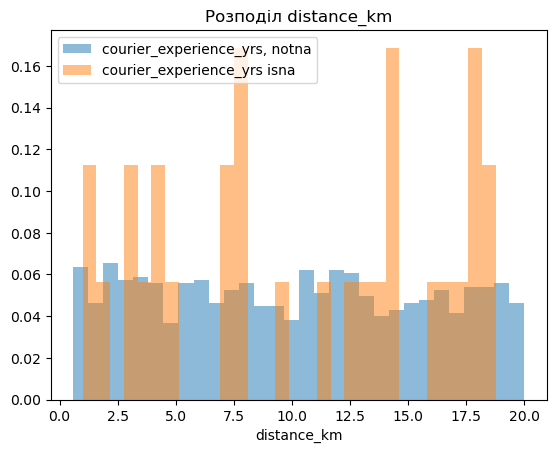

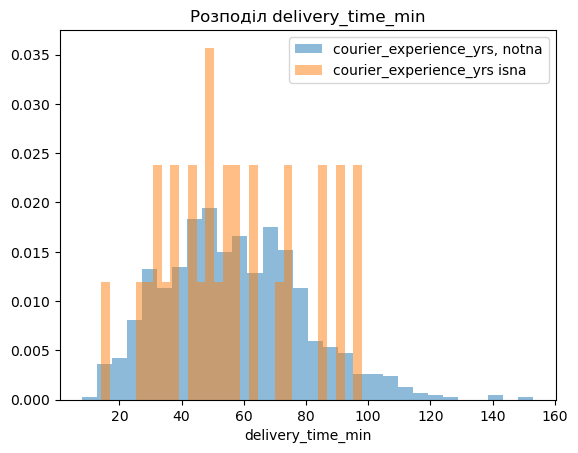

In [749]:
feature_distribution(df, 'courier_experience_yrs', dtype='')

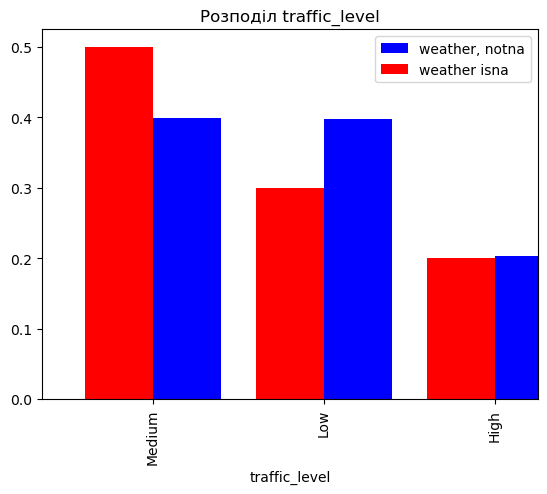

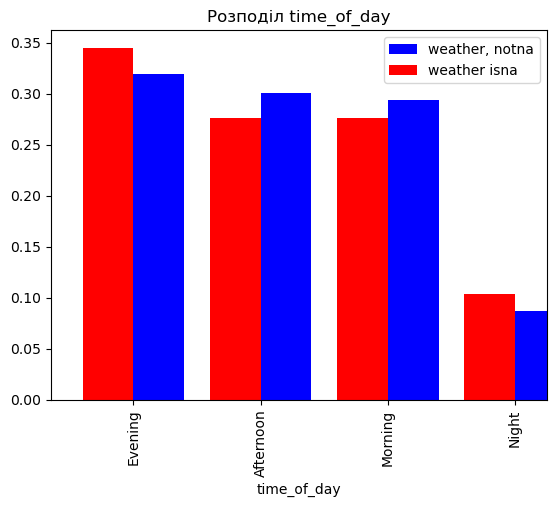

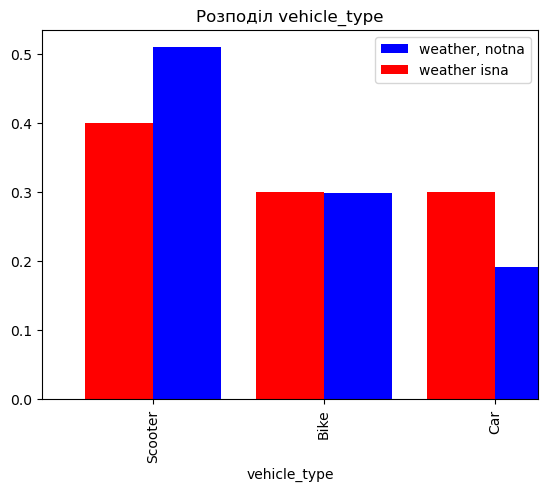

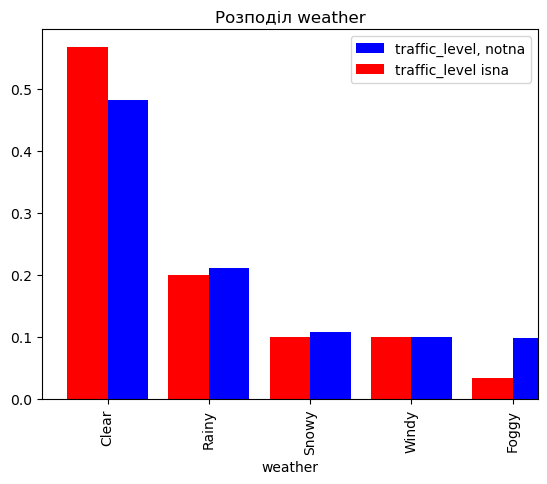

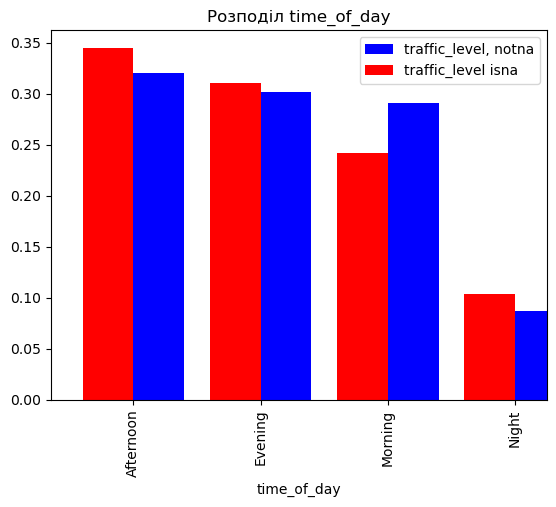

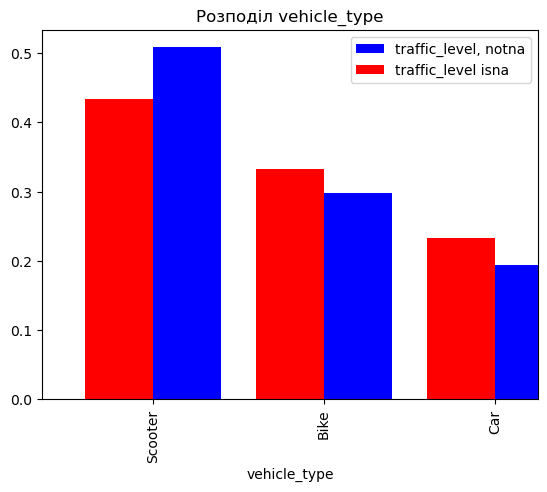

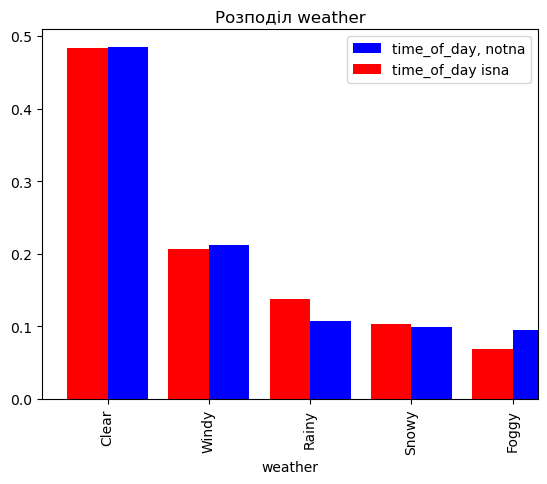

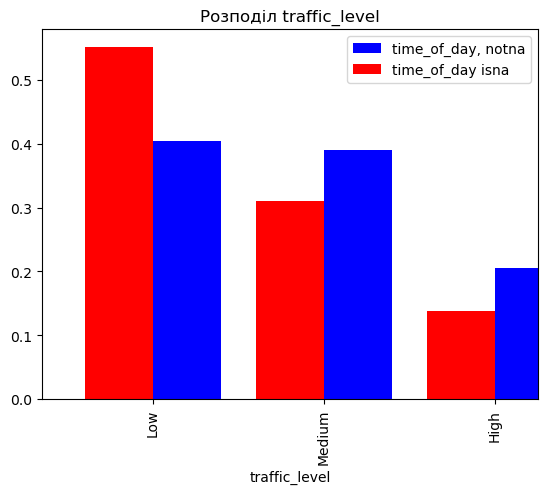

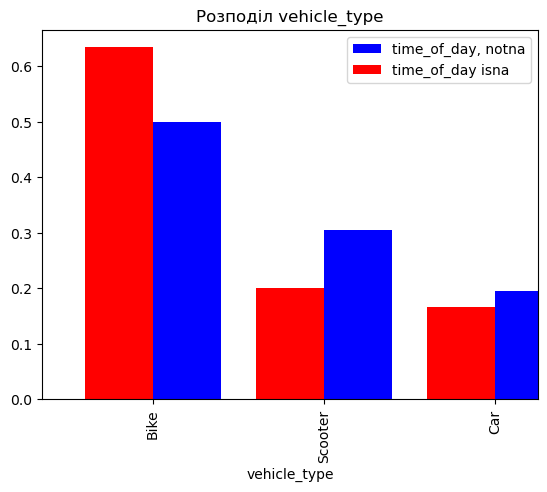

In [750]:
for i in ['weather', 'traffic_level', 'time_of_day']:
    feature_distribution(df, i)

Закономірностей у пропусках немає. Замінимо nan значення середніми для кількісних даних і модою для категоріальних.

In [751]:
for i in ['weather', 'traffic_level', 'time_of_day', 'courier_experience_yrs']:
    if df[i].dtype == 'O':
        df[i] = df[i].fillna(df[i].mode()[0])
    else:
        df[i] = df[i].fillna(df[i].mean())

In [752]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                1000 non-null   int64  
 1   distance_km             1000 non-null   float64
 2   weather                 1000 non-null   object 
 3   traffic_level           1000 non-null   object 
 4   time_of_day             1000 non-null   object 
 5   vehicle_type            1000 non-null   object 
 6   preparation_time_min    1000 non-null   int64  
 7   courier_experience_yrs  1000 non-null   float64
 8   delivery_time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [753]:
df.drop('order_id', axis=1, inplace=True)

# Аналіз даних

In [754]:
df.head()

distance_km weather traffic_level time_of_day vehicle_type  \
0         7.93   Windy           Low   Afternoon      Scooter   
1        16.42   Clear        Medium     Evening         Bike   
2         9.52   Foggy           Low       Night      Scooter   
3         7.44   Rainy        Medium   Afternoon      Scooter   
4        19.03   Clear           Low     Morning         Bike   

   preparation_time_min  courier_experience_yrs  delivery_time_min  
0                    12                     1.0                 43  
1                    20                     2.0                 84  
2                    28                     1.0                 59  
3                     5                     1.0                 37  
4                    16                     5.0                 68

In [755]:
cat_col = ['weather', 'traffic_level', 'time_of_day', 'vehicle_type', 'courier_experience_yrs']
for i in cat_col:
    print(df[i].value_counts(normalize=True), '\n')

weather
Clear    0.500
Rainy    0.204
Foggy    0.103
Snowy    0.097
Windy    0.096
Name: proportion, dtype: float64 

traffic_level
Medium    0.420
Low       0.383
High      0.197
Name: proportion, dtype: float64 

time_of_day
Morning      0.338
Evening      0.293
Afternoon    0.284
Night        0.085
Name: proportion, dtype: float64 

vehicle_type
Bike       0.503
Scooter    0.302
Car        0.195
Name: proportion, dtype: float64 

courier_experience_yrs
6.000000    0.109
9.000000    0.108
1.000000    0.107
8.000000    0.101
2.000000    0.099
4.000000    0.094
7.000000    0.091
0.000000    0.091
5.000000    0.090
3.000000    0.080
4.579381    0.030
Name: proportion, dtype: float64 



# В 91.5% випадків доставку замовляють вдень, на нічну доставку приходиться 0.085%. Найпопулярніший транспорт для кур'ерів це велосипед (50%), на другому і третьому місці скутер (30%) і машина (20%). В половину випадків доставка припадае на гарну погоду. Лише в 20% часу трафік на дорогах високий. Досвід у кур'ерів розподілен рівномірно, віл 0 до 9 років. Близько третини відсотка має досвід 4.579381, що є незрозумілим тому, що досвід написан цілочисельним занченням.

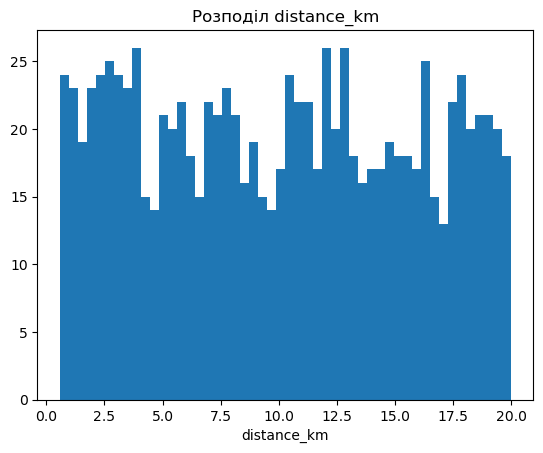

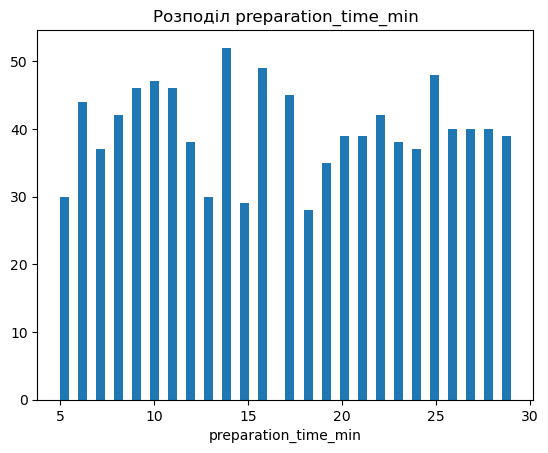

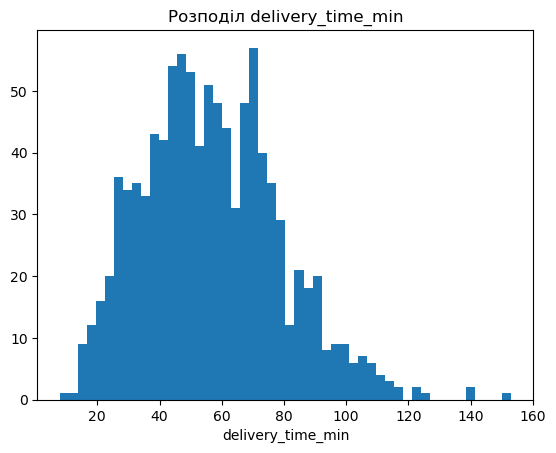

In [756]:
dig_col = ['distance_km', 'preparation_time_min', 'delivery_time_min']
for i in dig_col:
    plt.hist(df[i], bins=50)
    plt.title(f'Розподіл {i}')
    plt.xlabel(i)
    plt.show()

# Розподіл дистанції від точки А до точки Б має близький до рівномірного розподілу з деякими просадками. Можливо це визвано особливостями розташування закладів харчування та структуру міста.

Розподіл часу підготовки заказу має піки зліва та справа і просадки посередині. Це може бути пов'язано з популярністю характерних закладів у користувачів: менше чаму для підготовки заказу потрібно для фастфудів, більше часу потрібно для елітних закладів. Інформації про заклади в даних немає, не вийде це перевірити.

Час доставки має близький до нормального розподілу с довгим правим хвостом.

In [757]:
exp = {}
for i in df['courier_experience_yrs'].unique():
    if i <= 4:
        exp[i] = 'low'
    elif i >= 5:
        exp[i] = 'hight'
    else:
        exp[i] = 'middle'

df['new_courier_experience_yrs'] = df['courier_experience_yrs'].replace(exp)

In [758]:
df['courier_experience_yrs'].value_counts()

courier_experience_yrs
6.000000    109
9.000000    108
1.000000    107
8.000000    101
2.000000     99
4.000000     94
7.000000     91
0.000000     91
5.000000     90
3.000000     80
4.579381     30
Name: count, dtype: int64

In [759]:
df['new_courier_experience_yrs'].value_counts()

new_courier_experience_yrs
hight     499
low       471
middle     30
Name: count, dtype: int64

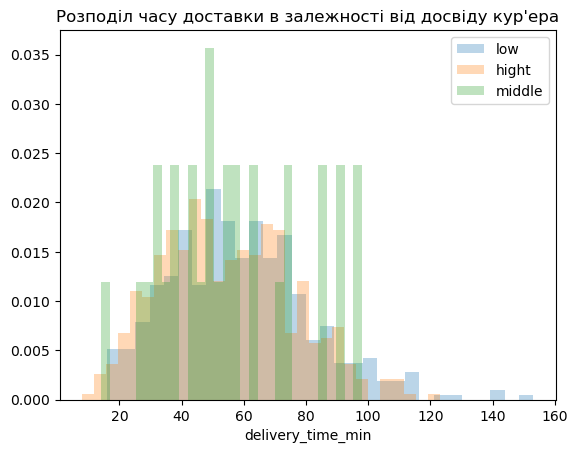

In [760]:
for i in df['new_courier_experience_yrs'].unique():
    plt.hist(df[df['new_courier_experience_yrs'] == i]['delivery_time_min'], bins=30, density=True, alpha=0.3, label=i)

plt.title("Розподіл часу доставки в залежності від досвіду кур'ера")
plt.xlabel('delivery_time_min')
plt.legend()
plt.show();

# Всього рядків з нестандартним досвідом кур'ерів 30 штук. На гістограммі видно, що вона більш менш наближена до нормального розподілу, як інші. Тому я зроблю висновки, що це помилка в даних і округлю значення 4.579381 до найближчого.

In [761]:
df['courier_experience_yrs'] = df['courier_experience_yrs'].apply(int)
df.drop(columns='new_courier_experience_yrs', inplace=True)

df['courier_experience_yrs'].value_counts()

courier_experience_yrs
4    124
6    109
9    108
1    107
8    101
2     99
0     91
7     91
5     90
3     80
Name: count, dtype: int64

In [762]:
df.head()

distance_km weather traffic_level time_of_day vehicle_type  \
0         7.93   Windy           Low   Afternoon      Scooter   
1        16.42   Clear        Medium     Evening         Bike   
2         9.52   Foggy           Low       Night      Scooter   
3         7.44   Rainy        Medium   Afternoon      Scooter   
4        19.03   Clear           Low     Morning         Bike   

   preparation_time_min  courier_experience_yrs  delivery_time_min  
0                    12                       1                 43  
1                    20                       2                 84  
2                    28                       1                 59  
3                     5                       1                 37  
4                    16                       5                 68

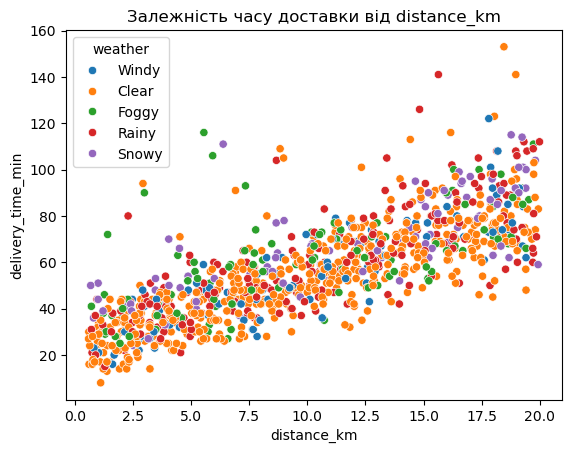

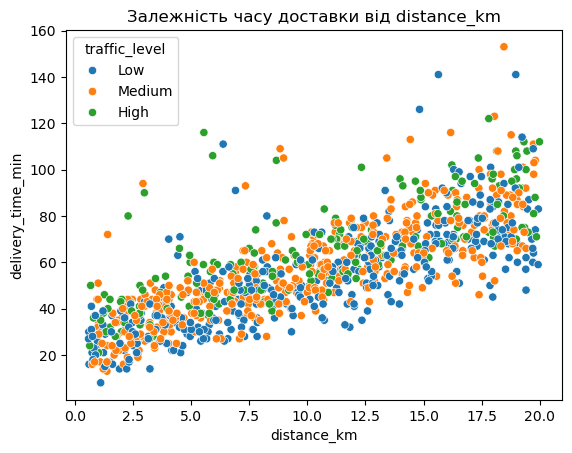

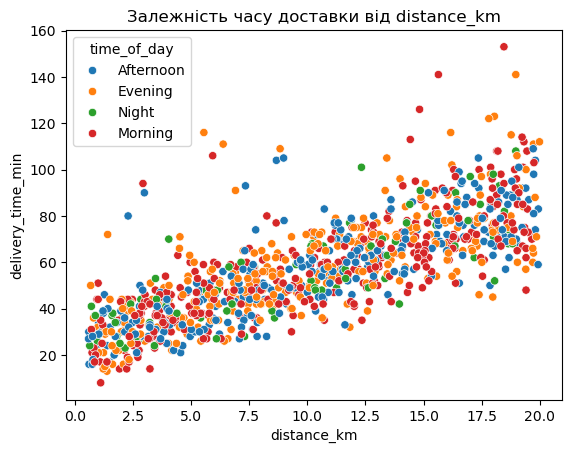

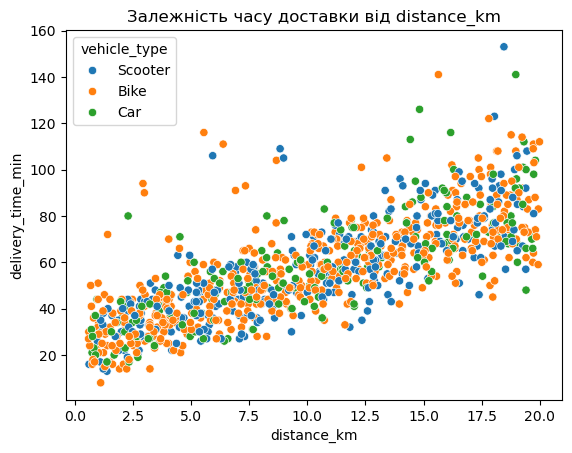

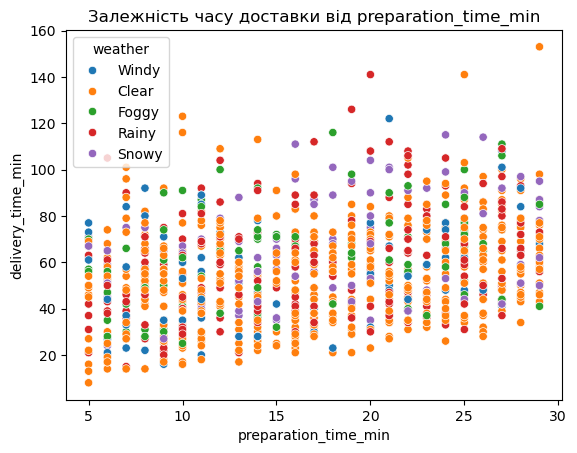

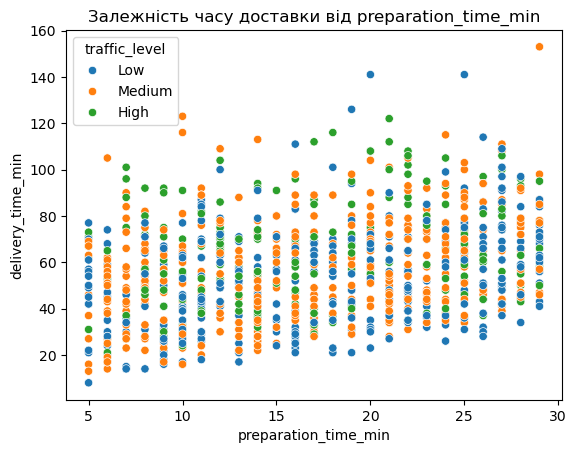

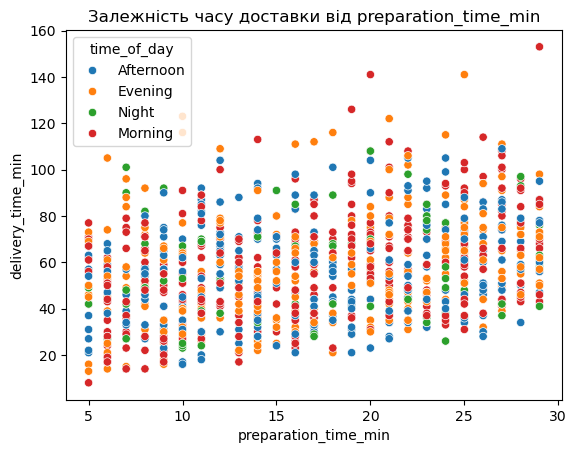

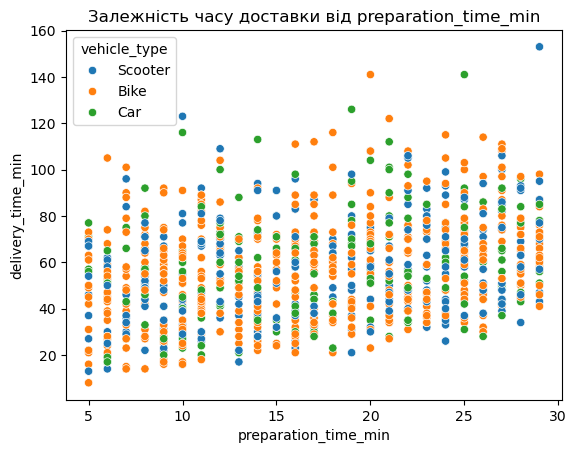

In [763]:
for i in ['distance_km', 'preparation_time_min']:
    for c in ['weather', 'traffic_level', 'time_of_day', 'vehicle_type']:
        sns.scatterplot(data=df, x=i, y='delivery_time_min', hue=c)
    
        plt.title(f'Залежність часу доставки від {i}')
        plt.xlabel(i)
        plt.ylabel('delivery_time_min')
        
        plt.show();

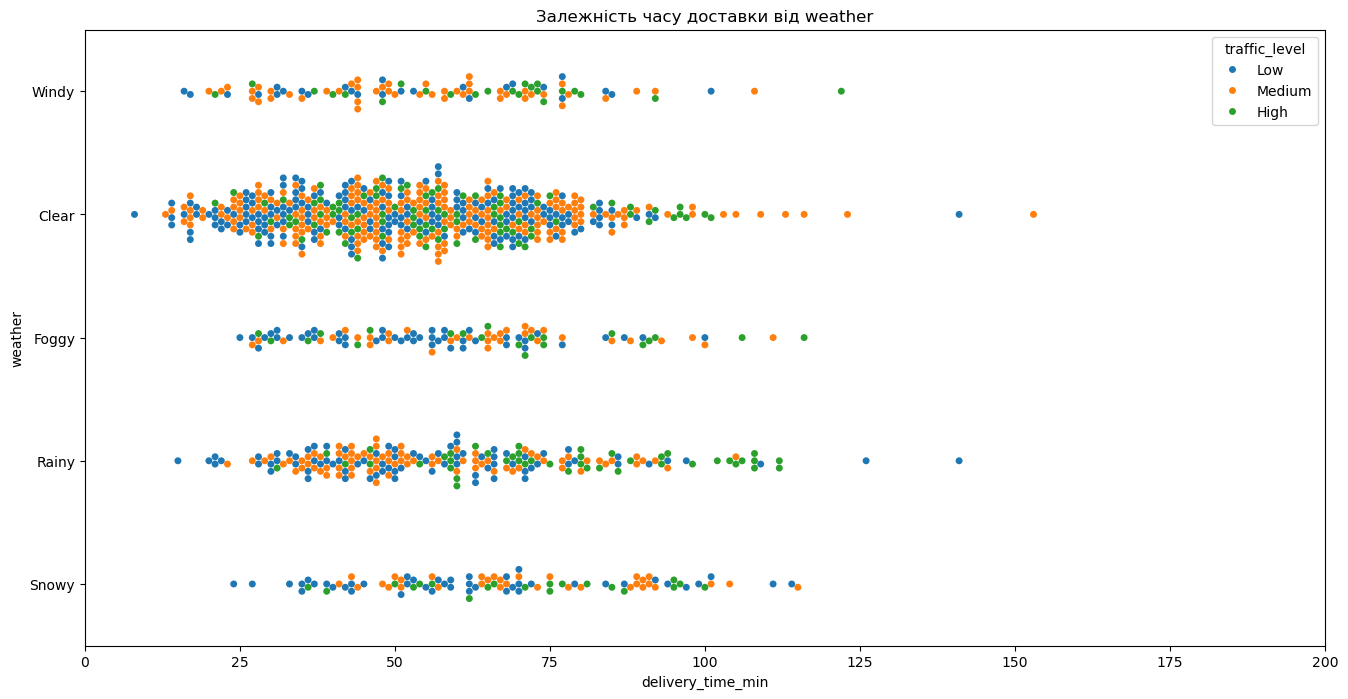

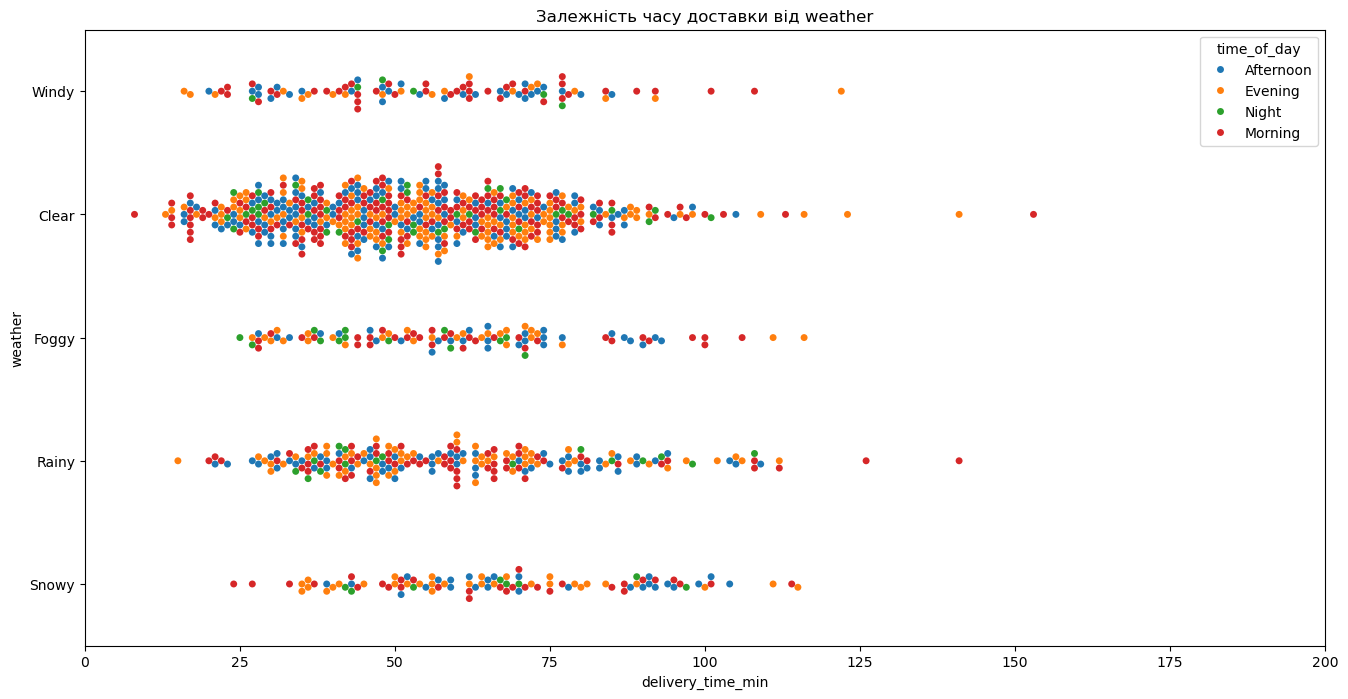

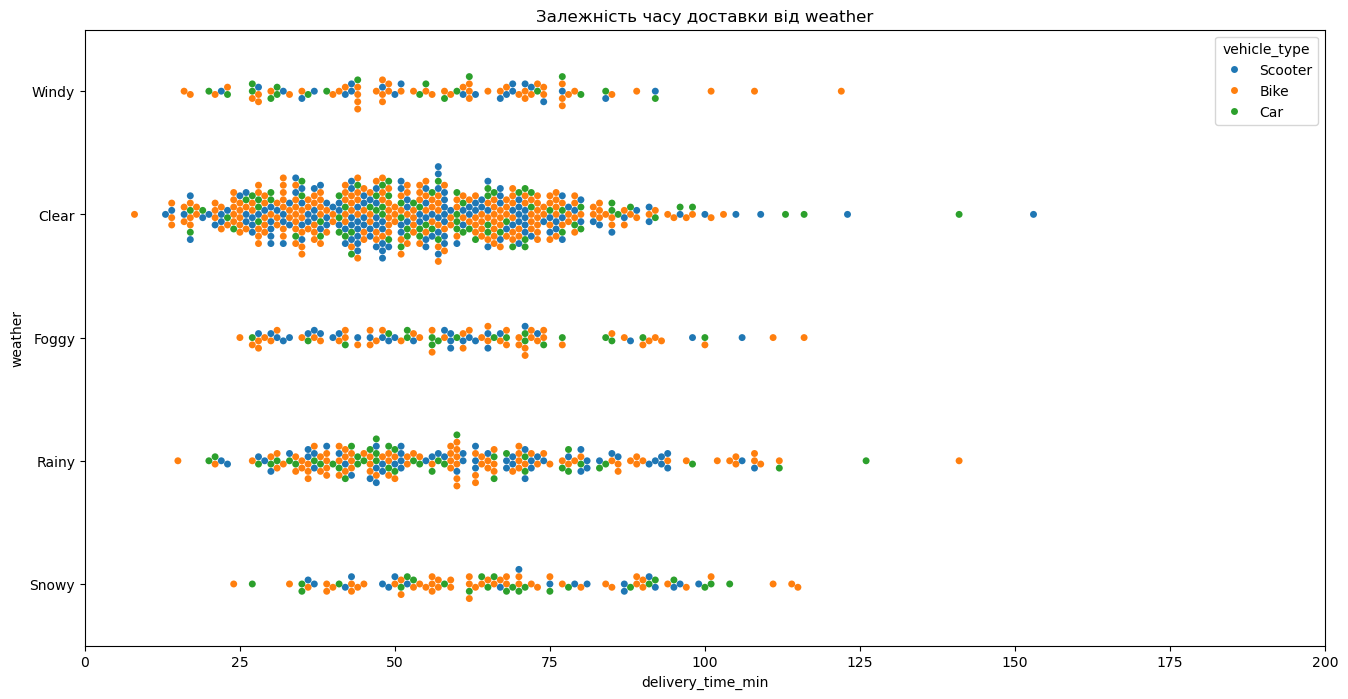

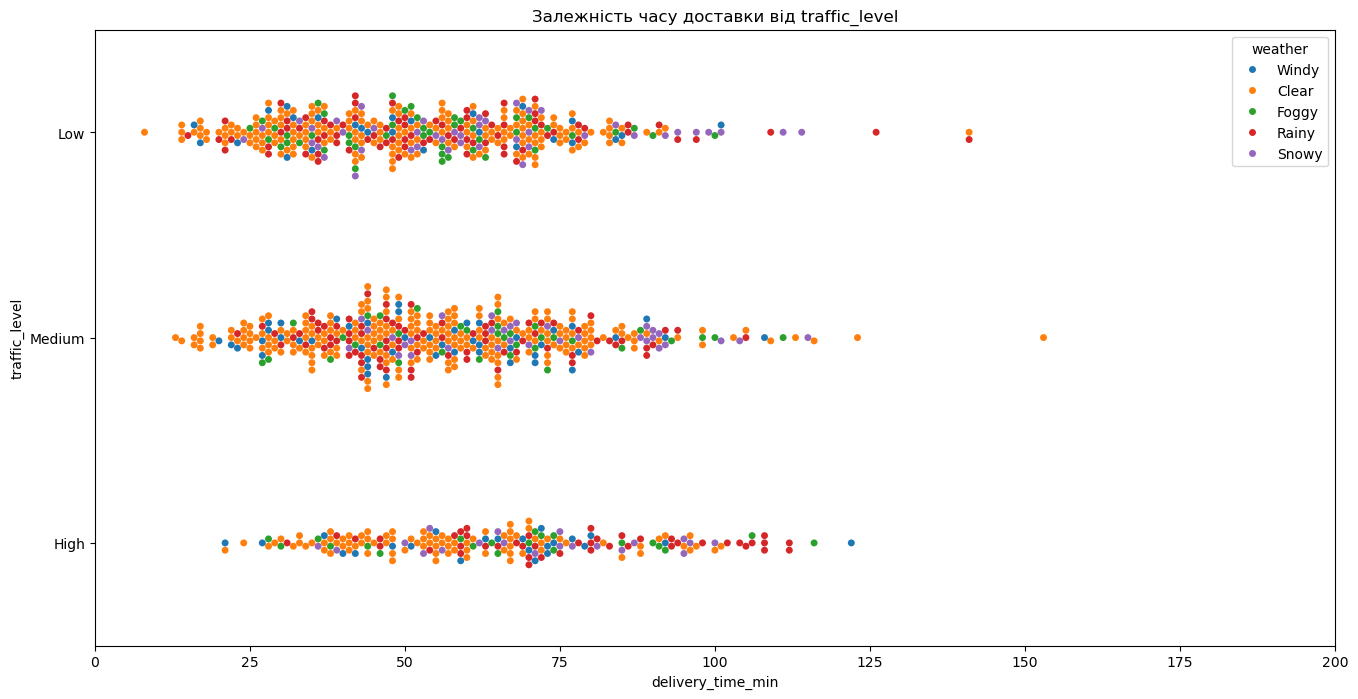

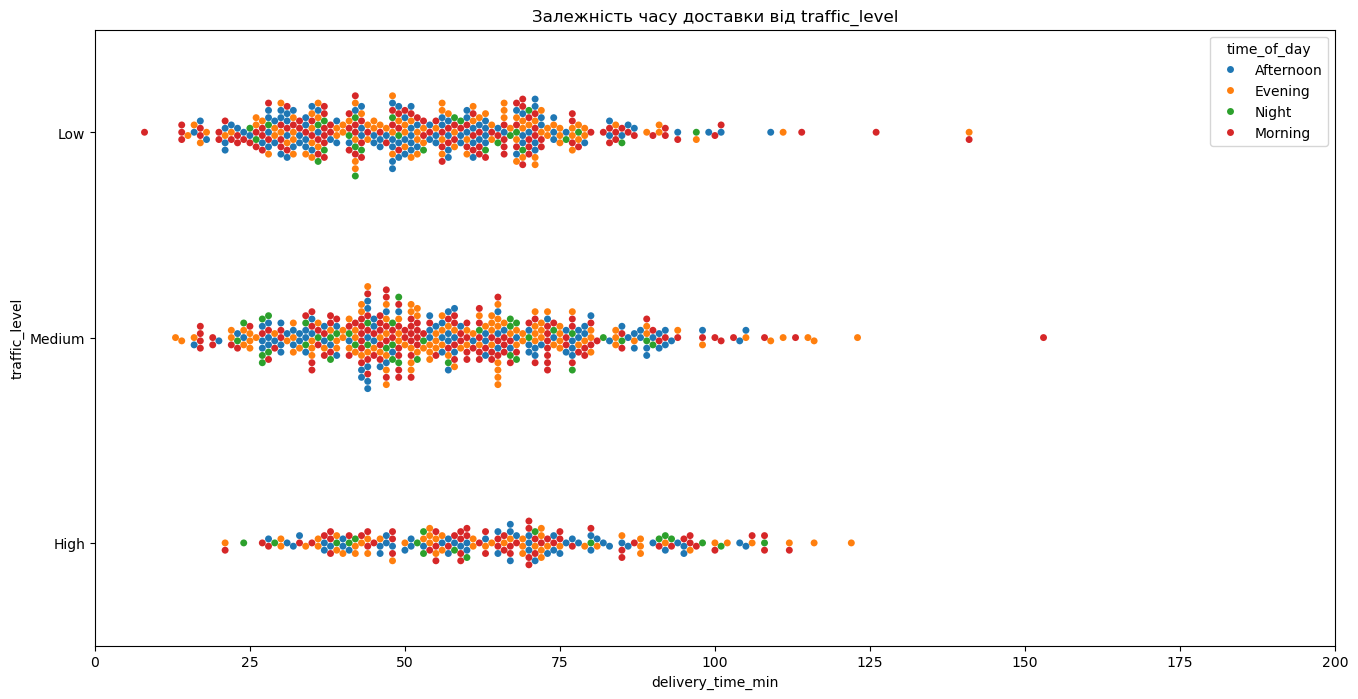

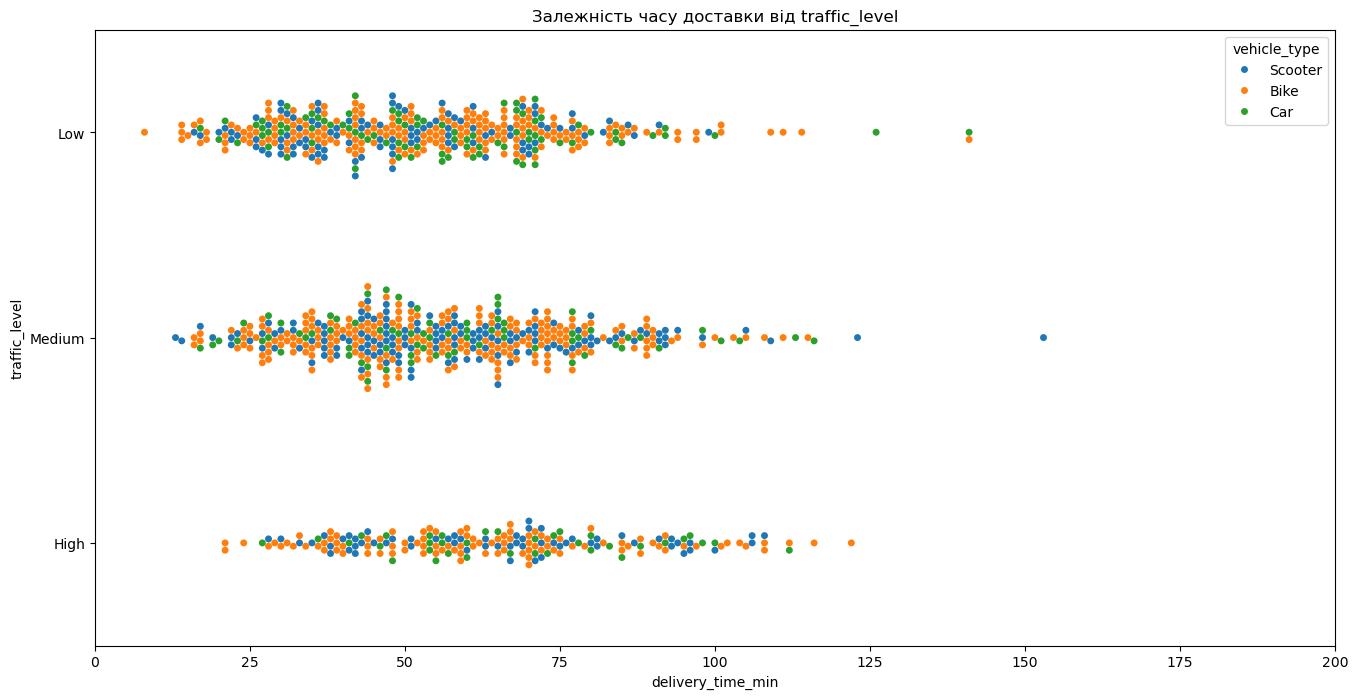

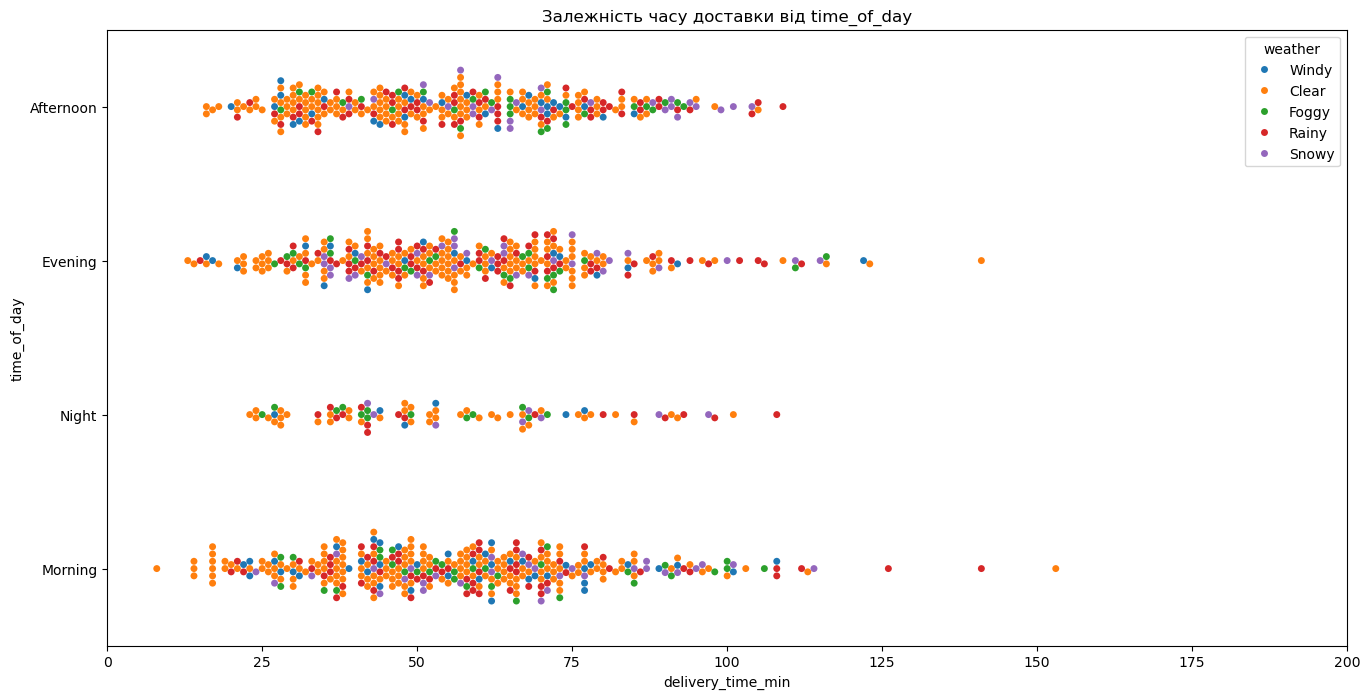

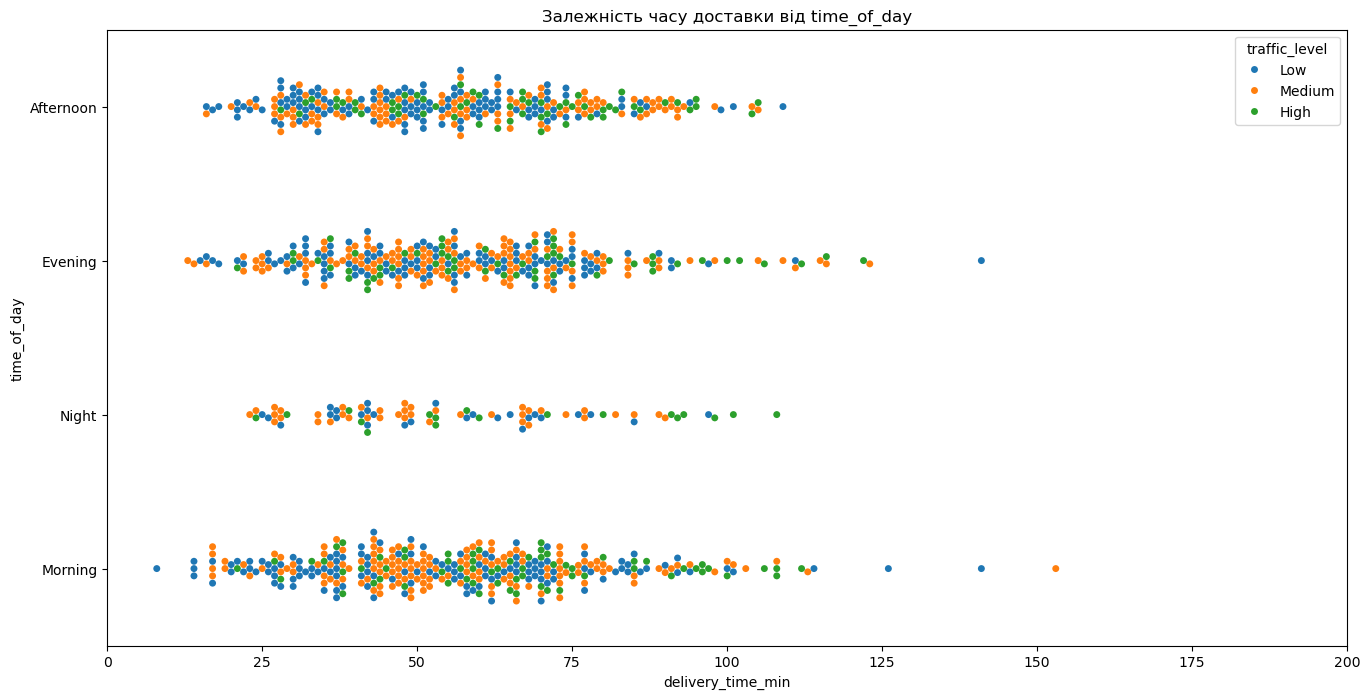

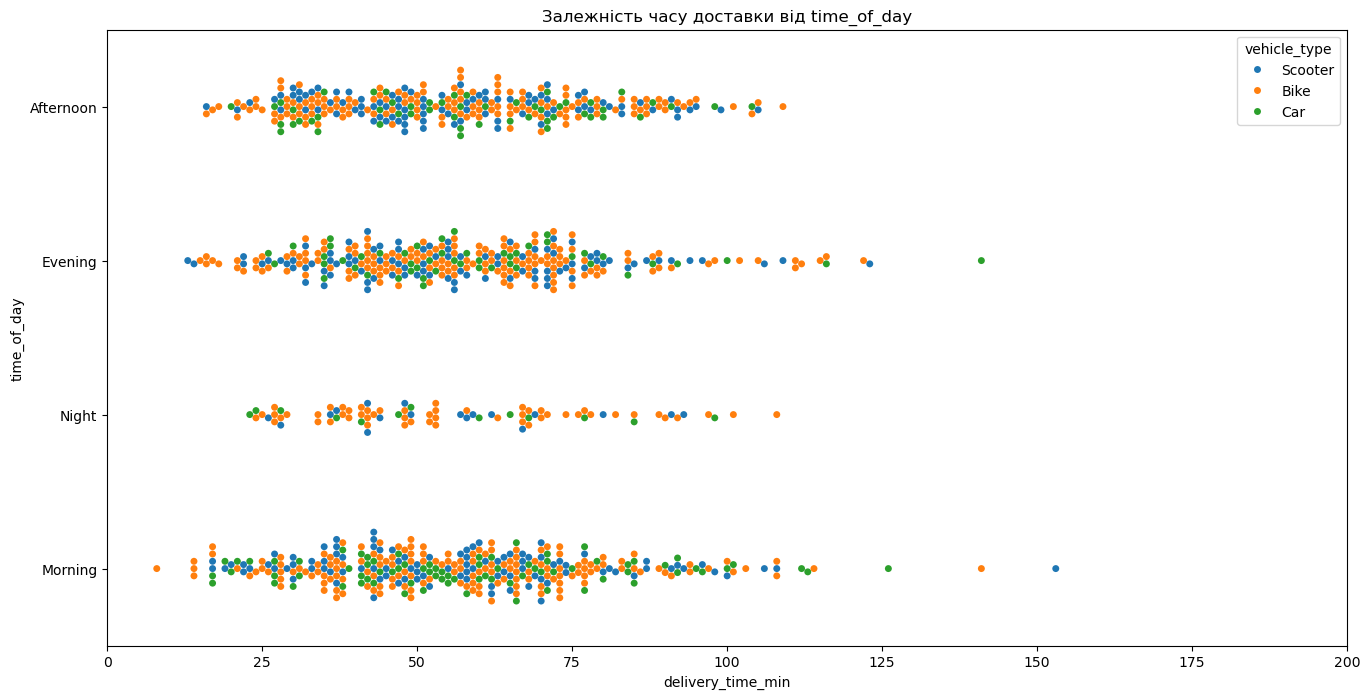

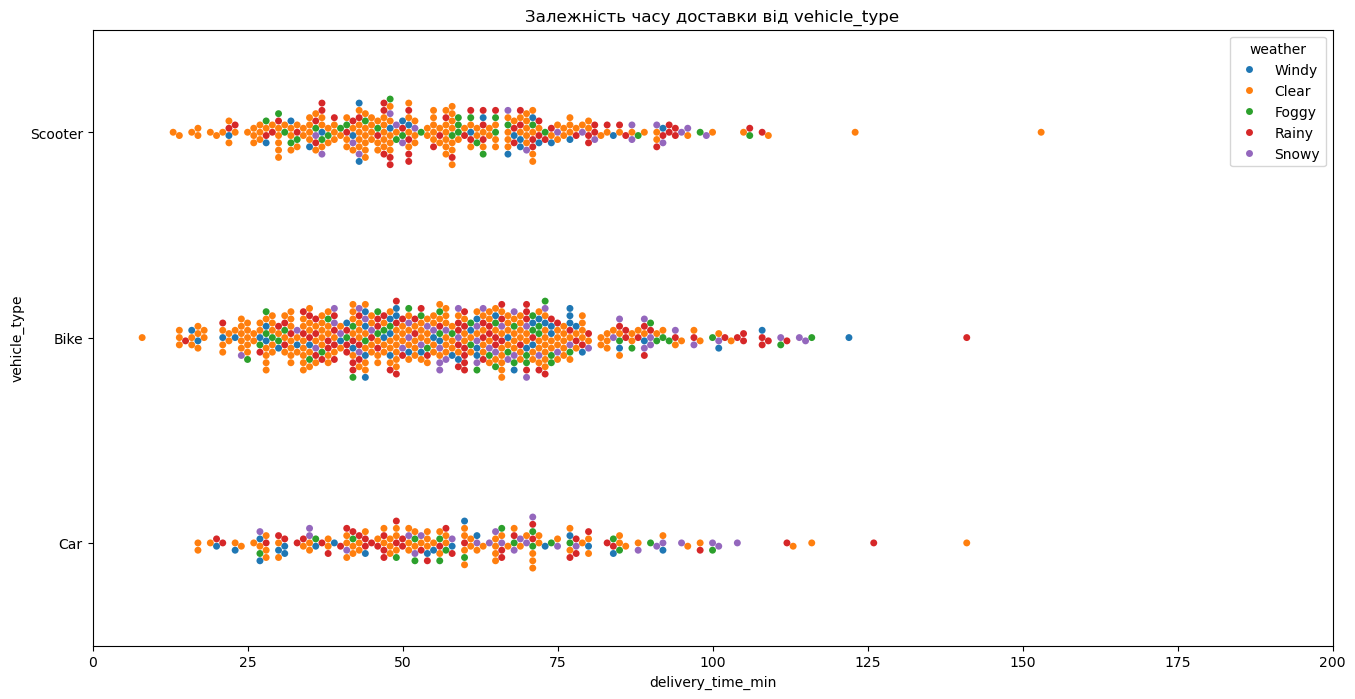

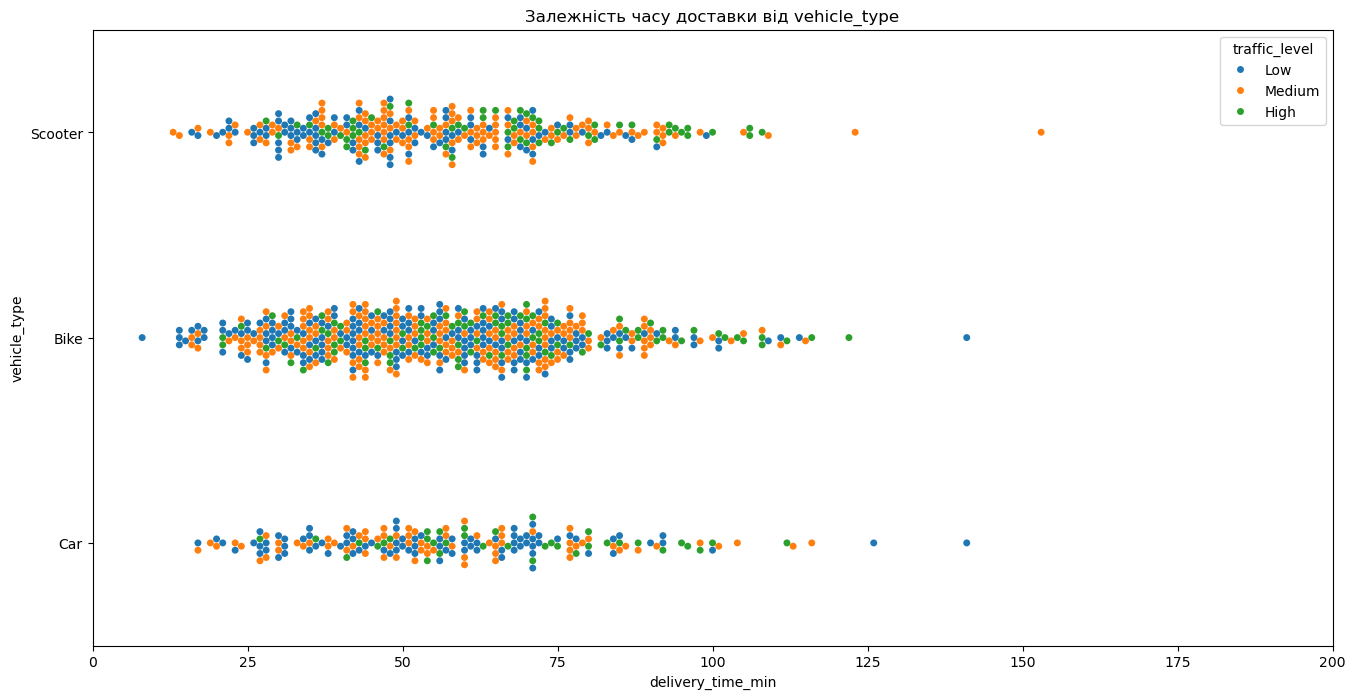

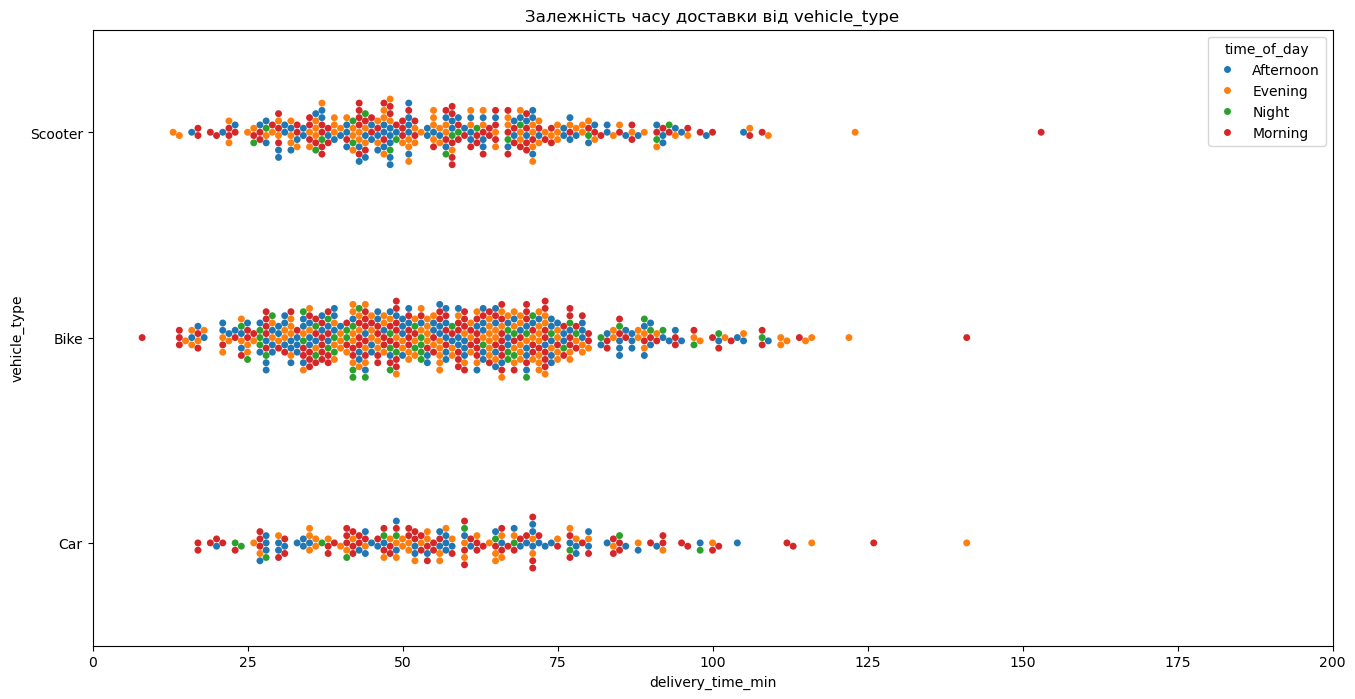

In [764]:
columns = ['weather', 'traffic_level', 'time_of_day', 'vehicle_type']
for i in columns:
    for c in columns:
        if i == c:
            continue

        plt.figure(figsize=(16,8))
        sns.swarmplot(data=df, x='delivery_time_min', y=i, hue=c)

        plt.xlim(0, 200)
        
        plt.title(f'Залежність часу доставки від {i}')
        plt.xlabel('delivery_time_min')
        plt.ylabel(i)
        
        plt.show();

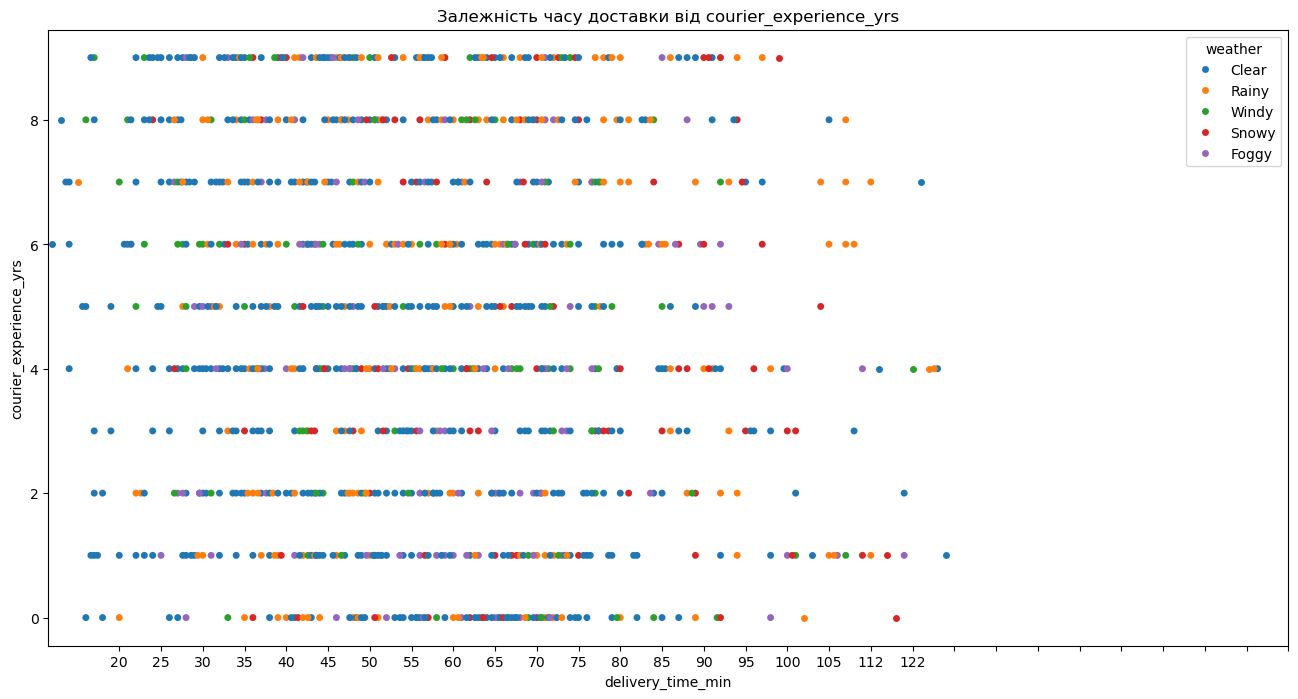

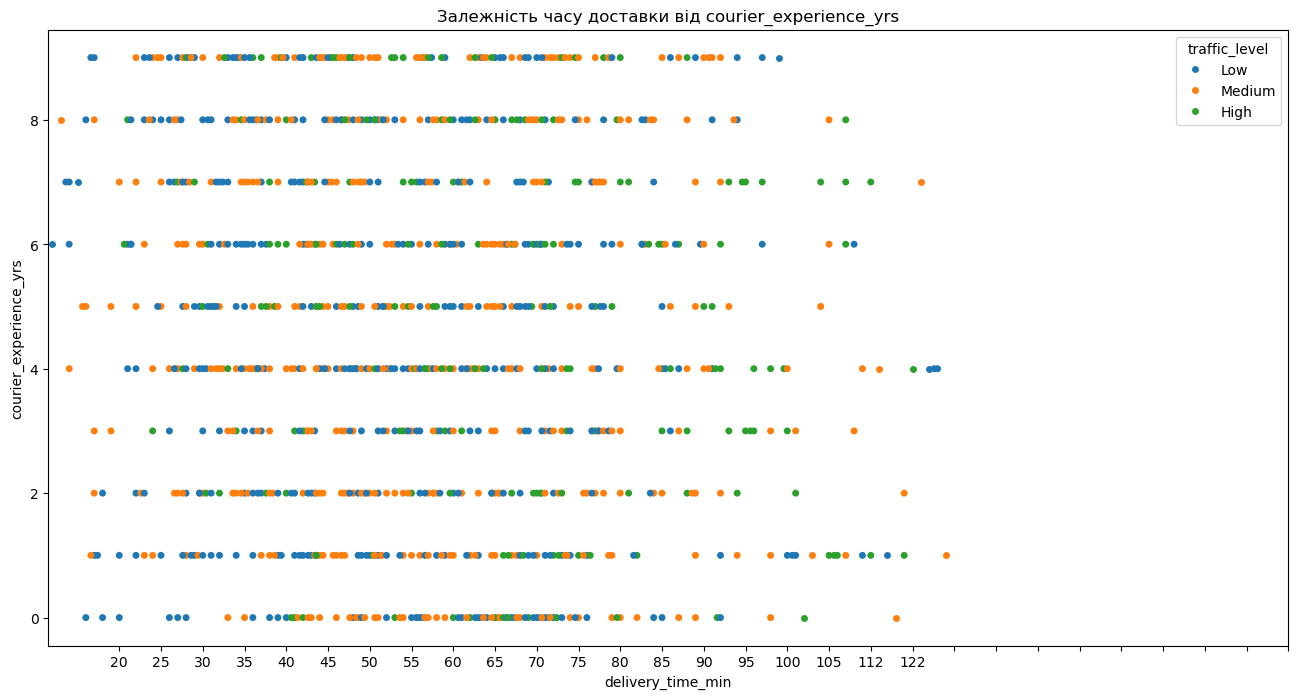

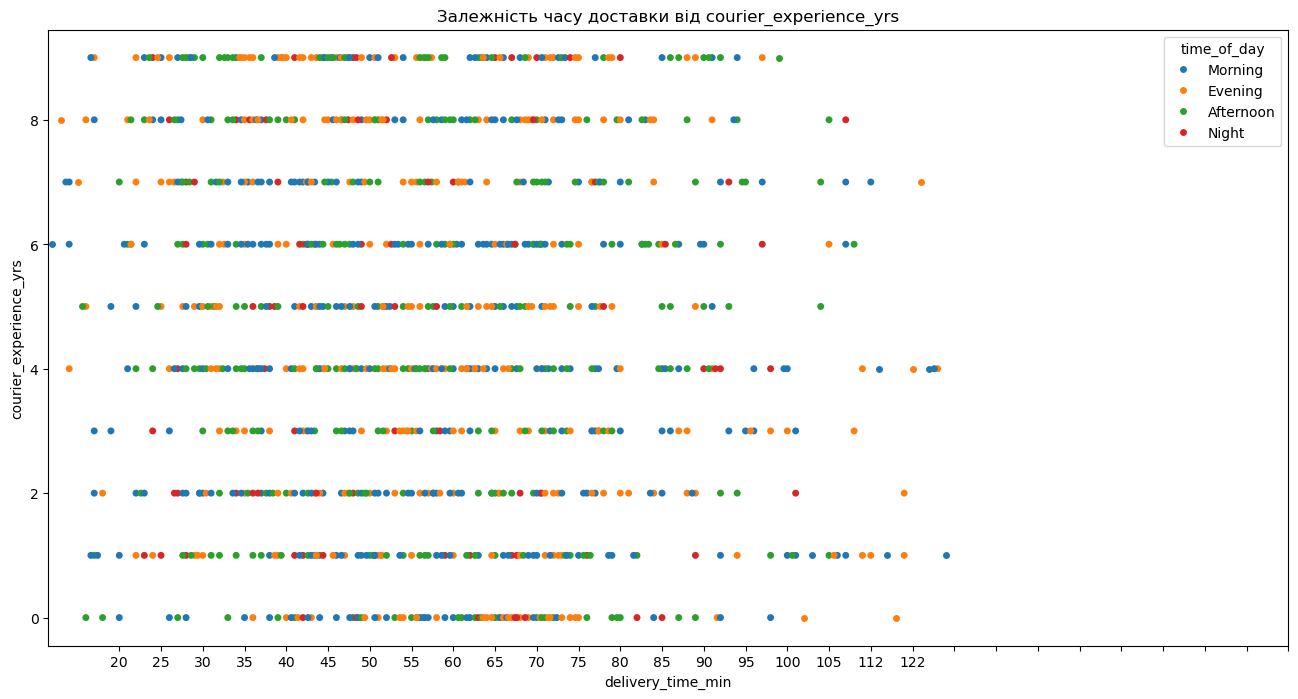

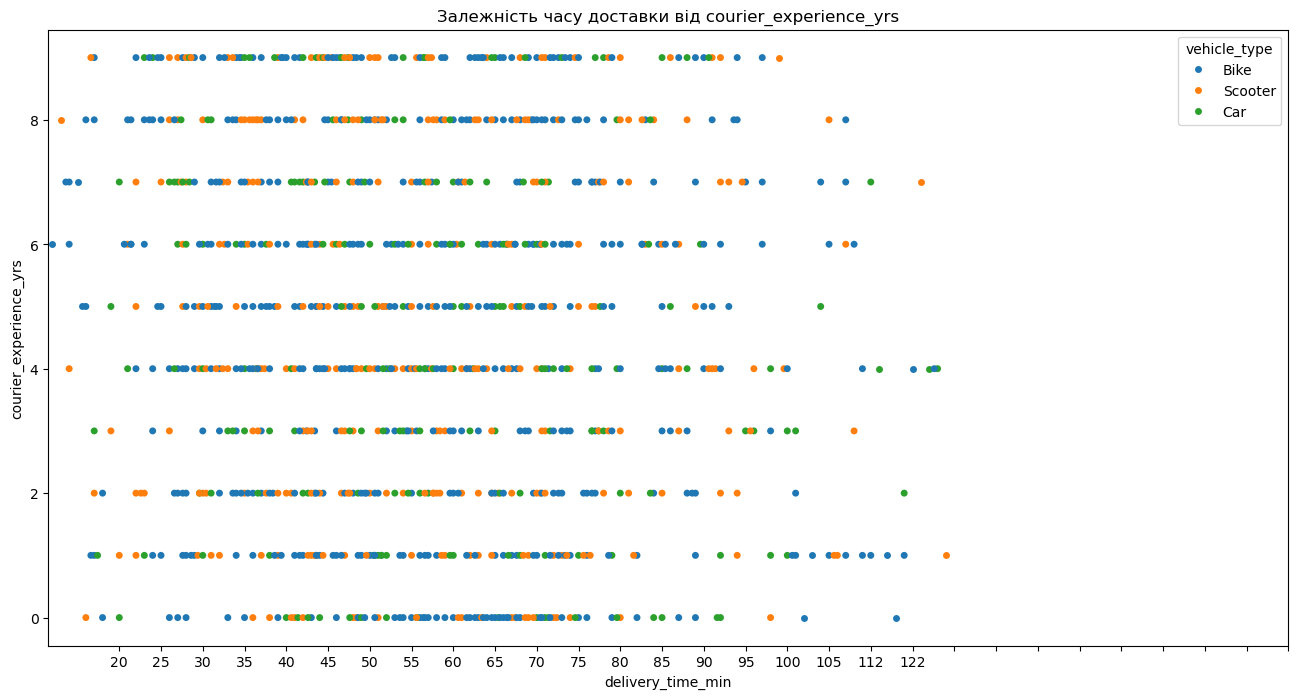

In [765]:
for i in ['courier_experience_yrs']:
    for c in columns:
        if i == c:
            continue

        plt.figure(figsize=(16,8))
        sns.swarmplot(data=df, x='delivery_time_min', y=i, hue=c)

        plt.xticks(np.arange(min(df['delivery_time_min']), max(df['delivery_time_min']), step=5))
        # plt.xlim(0, 150)
        
        plt.title(f'Залежність часу доставки від {i}')
        plt.xlabel('delivery_time_min')
        plt.ylabel(i)
        
        plt.show();

In [766]:
def huber_regressor(X_col, y_col):
    X = df[[X_col]]
    y = df[y_col]
    
    model_huber = HuberRegressor(epsilon=1.35)
    model_huber.fit(X, y)
    print(f'{X_col}: intercept {model_huber.intercept_}, coef {model_huber.coef_}')
    
    y_pred = model_huber.predict(X)
    
    return y_pred


def residuals(y_true, y_pred):
    residuals_series = y_true - y_pred

    plt.hist(residuals_series, bins=30)
    plt.title('Розподіл залишків')
    plt.show();

    return residuals_series


def outliers(X, y, X_col, residuals):
    lower_bound = np.percentile(residuals, 2.5)
    upper_bound = np.percentile(residuals, 97.5)
    # outliers_series = (residuals < lower_bound) | (residuals > upper_bound)
    outliers_series = (residuals > upper_bound)
    
    plt.scatter(X[~outliers_series], y[~outliers_series], label='Звичайні дані')
    plt.scatter(X[outliers_series], y[outliers_series], color='red', label='Викиди')
    plt.plot(X, y_pred, color='green', label='Пряма')
    
    plt.title(f'Залежність часу доставки від {X_col}')
    plt.xlabel(X_col)
    plt.ylabel('delivery_time_min')
    plt.legend()
    
    plt.show();

    return outliers_series

distance_km: intercept 25.387866547093754, coef [3.01253605]


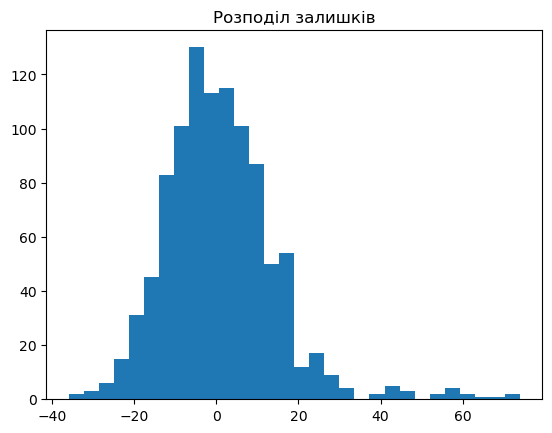

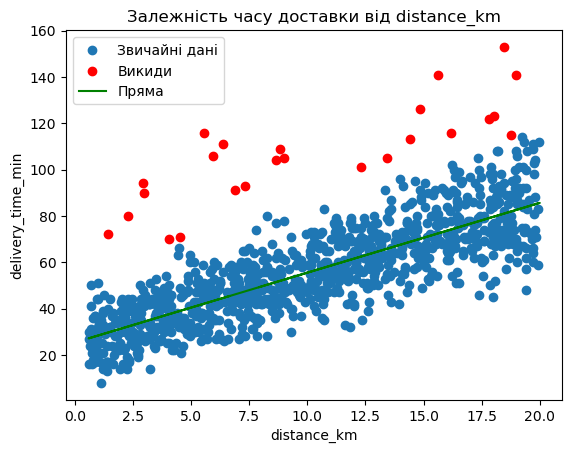

distance_km weather traffic_level time_of_day vehicle_type  \
0         7.93   Windy           Low   Afternoon      Scooter   
1        16.42   Clear        Medium     Evening         Bike   
2         9.52   Foggy           Low       Night      Scooter   
3         7.44   Rainy        Medium   Afternoon      Scooter   
4        19.03   Clear           Low     Morning         Bike   

   preparation_time_min  courier_experience_yrs  delivery_time_min  \
0                    12                       1                 43   
1                    20                       2                 84   
2                    28                       1                 59   
3                     5                       1                 37   
4                    16                       5                 68   

   distance_km_outliers  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False

In [767]:
# distance_km, delivery_time_min
X_col, y_col = 'distance_km', 'delivery_time_min'
y_true = df[y_col]

y_pred = huber_regressor(X_col, y_col)

residuals_series = residuals(y_true, y_pred)

outlier_series = outliers(df[X_col], df[y_col], X_col, residuals_series)

df[f'{X_col}_outliers'] = outlier_series

df.head()

preparation_time_min: intercept 39.77766409115685, coef [0.9087467]


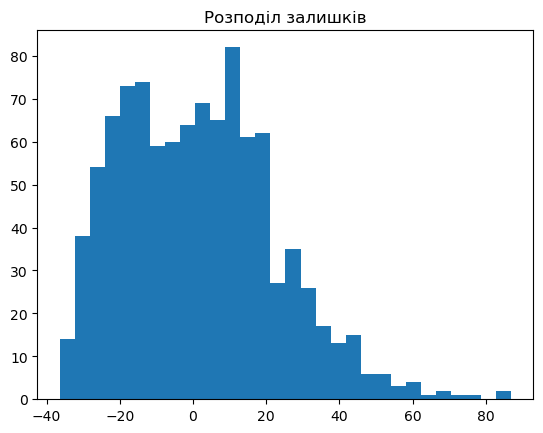

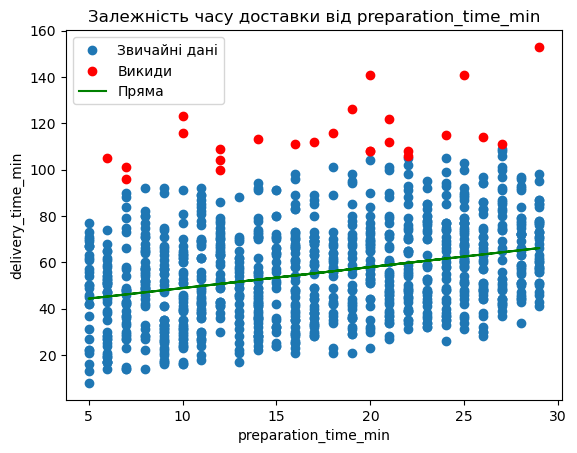

distance_km weather traffic_level time_of_day vehicle_type  \
0         7.93   Windy           Low   Afternoon      Scooter   
1        16.42   Clear        Medium     Evening         Bike   
2         9.52   Foggy           Low       Night      Scooter   
3         7.44   Rainy        Medium   Afternoon      Scooter   
4        19.03   Clear           Low     Morning         Bike   

   preparation_time_min  courier_experience_yrs  delivery_time_min  \
0                    12                       1                 43   
1                    20                       2                 84   
2                    28                       1                 59   
3                     5                       1                 37   
4                    16                       5                 68   

   distance_km_outliers  preparation_time_min_outliers  
0                 False                          False  
1                 False                          False  
2                 False                          False  
3                 False                          False  
4                 False                          False

In [768]:
# preparation_time_min, delivery_time_min
X_col, y_col = 'preparation_time_min', 'delivery_time_min'
y_true = df[y_col]

y_pred = huber_regressor(X_col, y_col)

residuals_series = residuals(y_true, y_pred)

outlier_series = outliers(df[X_col], df[y_col], X_col, residuals_series)

df[f'{X_col}_outliers'] = outlier_series

df.head()

In [769]:
def boxplot_upper_bound(values):
    q1 = values.quantile(0.25)
    q3 = values.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    return upper_bound


def categorical_col_outliers(df, column):
    upper_bound_series = df.groupby(column)['delivery_time_min'].apply(boxplot_upper_bound)
    outliers = df.apply(lambda row: row['delivery_time_min'] > upper_bound_series[row[column]], axis=1)

    return outliers

In [770]:
columns = ['weather', 'traffic_level', 'time_of_day', 'vehicle_type', 'courier_experience_yrs']
for i in columns:
    df[f'{i}_outliers'] = categorical_col_outliers(df, i)

In [771]:
df.head()

distance_km weather traffic_level time_of_day vehicle_type  \
0         7.93   Windy           Low   Afternoon      Scooter   
1        16.42   Clear        Medium     Evening         Bike   
2         9.52   Foggy           Low       Night      Scooter   
3         7.44   Rainy        Medium   Afternoon      Scooter   
4        19.03   Clear           Low     Morning         Bike   

   preparation_time_min  courier_experience_yrs  delivery_time_min  \
0                    12                       1                 43   
1                    20                       2                 84   
2                    28                       1                 59   
3                     5                       1                 37   
4                    16                       5                 68   

   distance_km_outliers  preparation_time_min_outliers  weather_outliers  \
0                 False                          False             False   
1                 False                          False             False   
2                 False                          False             False   
3                 False                          False             False   
4                 False                          False             False   

   traffic_level_outliers  time_of_day_outliers  vehicle_type_outliers  \
0                   False                 False                  False   
1                   False                 False                  False   
2                   False                 False                  False   
3                   False                 False                  False   
4                   False                 False                  False   

   courier_experience_yrs_outliers  
0                            False  
1                            False  
2                            False  
3                            False  
4                            False

In [772]:
print('Всього викидів')

c = ['distance_km_outliers', 'preparation_time_min_outliers']
df[[f'{i}_outliers' for i in columns] + c].sum()

Всього викидів


weather_outliers                    8
traffic_level_outliers              7
time_of_day_outliers                9
vehicle_type_outliers               7
courier_experience_yrs_outliers     8
distance_km_outliers               25
preparation_time_min_outliers      25
dtype: int64

In [773]:
(
    df[df['distance_km_outliers']].shape, 
    df[df['preparation_time_min_outliers']].shape, 
    df[(df['distance_km_outliers']) & (df['preparation_time_min_outliers'])].shape
)

((25, 15), (25, 15), (15, 15))

In [774]:
df[(df['distance_km_outliers']) & (df['preparation_time_min_outliers'])]

distance_km weather traffic_level time_of_day vehicle_type  \
29         18.05   Clear        Medium     Evening      Scooter   
73          6.38   Snowy           Low     Evening         Bike   
127        18.97   Clear           Low     Evening          Car   
140         5.55   Foggy          High     Evening         Bike   
149        14.43   Clear        Medium     Morning          Car   
343         8.83   Clear        Medium     Evening      Scooter   
379        18.46   Clear        Medium     Morning      Scooter   
452        15.64   Rainy           Low     Morning         Bike   
495        18.77   Snowy        Medium     Evening         Bike   
550        16.17   Clear        Medium     Evening          Car   
619        13.42   Rainy        Medium     Evening         Bike   
735         8.67   Rainy          High   Afternoon         Bike   
784        14.83   Rainy           Low     Morning          Car   
797        12.33   Clear          High       Night         Bike   
924        17.81   Windy          High     Evening         Bike   

     preparation_time_min  courier_experience_yrs  delivery_time_min  \
29                     10                       7                123   
73                     16                       1                111   
127                    25                       4                141   
140                    18                       1                116   
149                    14                       4                113   
343                    12                       3                109   
379                    29                       1                153   
452                    20                       4                141   
495                    24                       0                115   
550                    10                       2                116   
619                     6                       6                105   
735                    12                       7                104   
784                    19                       4                126   
797                     7                       2                101   
924                    21                       4                122   

     distance_km_outliers  preparation_time_min_outliers  weather_outliers  \
29                   True                           True              True   
73                   True                           True             False   
127                  True                           True              True   
140                  True                           True              True   
149                  True                           True             False   
343                  True                           True             False   
379                  True                           True              True   
452                  True                           True              True   
495                  True                           True             False   
550                  True                           True              True   
619                  True                           True             False   
735                  True                           True             False   
784                  True                           True              True   
797                  True                           True             False   
924                  True                           True              True   

     traffic_level_outliers  time_of_day_outliers  vehicle_type_outliers  \
29                     True                  True                   True   
73                    False                 False                  False   
127                    True                  True                   True   
140                   False                  True                  False   
149                   False                 False                  False   
343                   False                 False                  False  

In [775]:
def feature_distribution(df, target_column):
    print(df[~df[target_column]].shape, df[df[target_column]].shape)
    if df[target_column].dtype != 'O':
        columns = ['distance_km', 'courier_experience_yrs', 'delivery_time_min', 'preparation_time_min']
        bins = 30
        alpha = 0.5
        for i in columns:
            if i == target_column: # or i in target_column:
                continue
            plt.hist(df[~df[target_column]][i], bins=bins, alpha=alpha, density=True, label=f'{target_column}, not outlier')
            plt.hist(df[df[target_column]][i], bins=bins, alpha=alpha, density=True, label=f'{target_column}, outlier')
            plt.title(f'Розподіл {i}')
            plt.xlabel(i)
            plt.legend()
            plt.show()
    else:
        columns = ['weather', 'traffic_level', 'time_of_day', 'vehicle_type']
        width = 0.4
        for i in columns:
            if target_column == i:
                continue
            notna = df[~df[target_column]][i].value_counts(normalize=True)
            isna = df[df[target_column]][i].value_counts(normalize=True)

            notna.plot(kind='bar', width=width, color='b', position=0, label=f'{target_column}, not outlier')
            isna.plot(kind='bar', width=width, color='r', position=1, label=f'{target_column}, outlier')
            plt.title(f'Розподіл {i}')
            plt.xlabel(i)
            plt.legend()
            plt.show()

(975, 15) (25, 15)


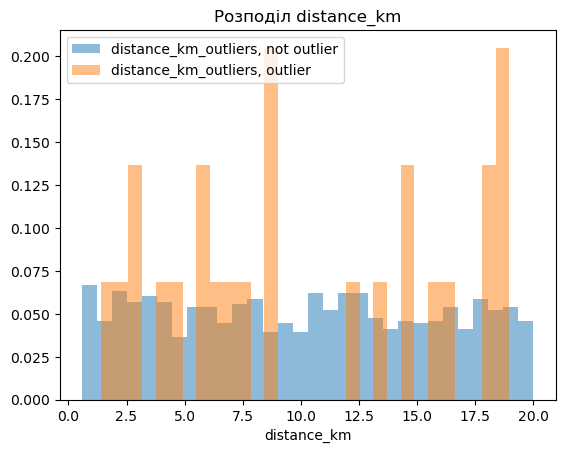

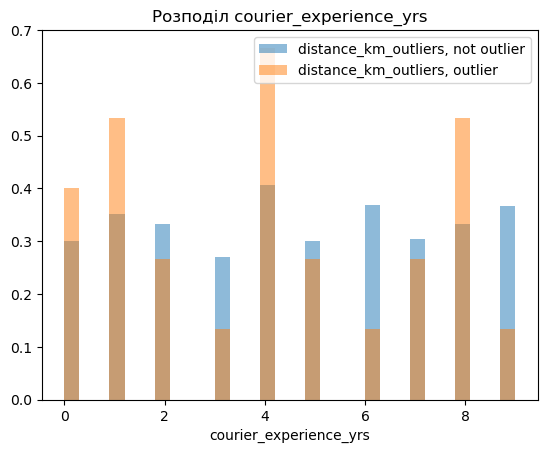

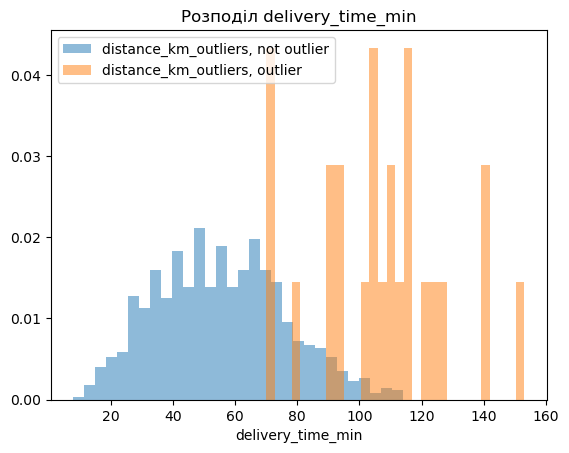

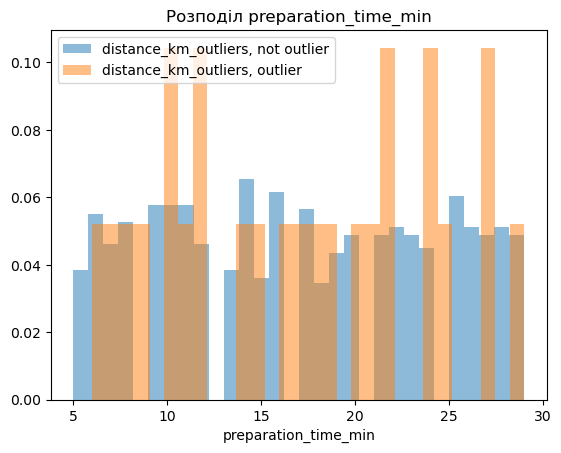

(975, 15) (25, 15)


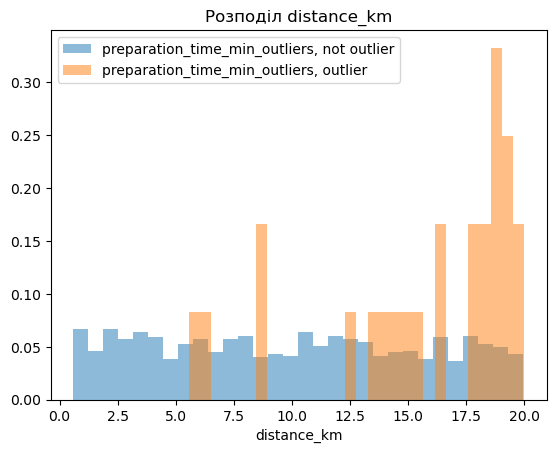

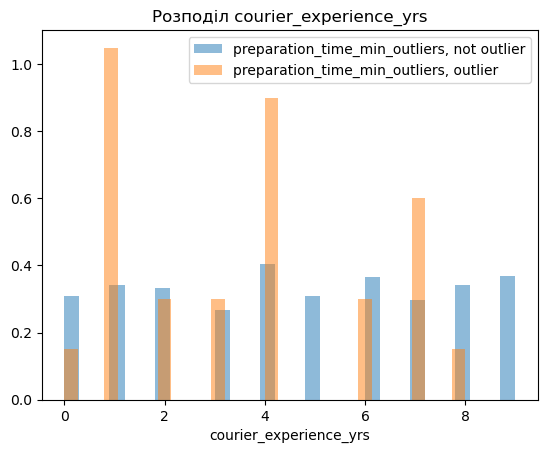

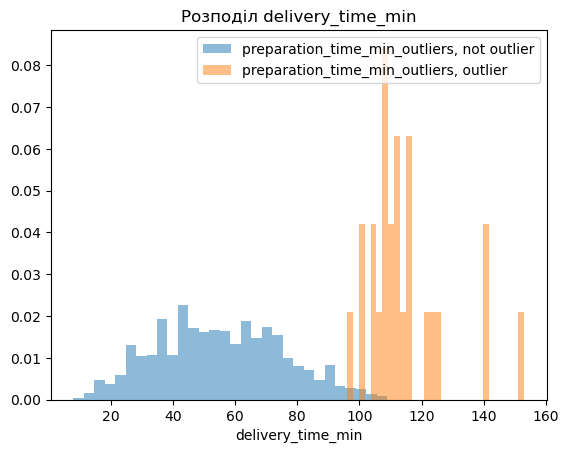

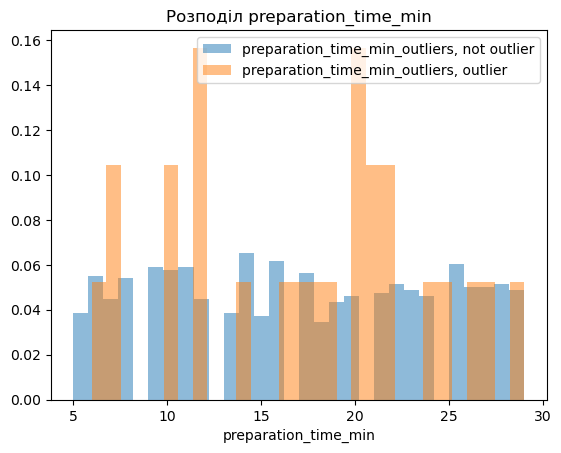

(992, 15) (8, 15)


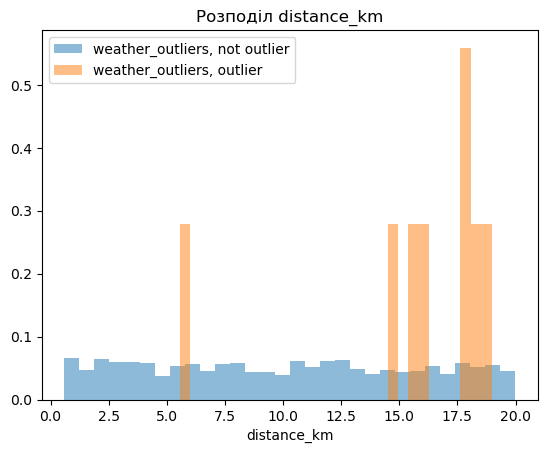

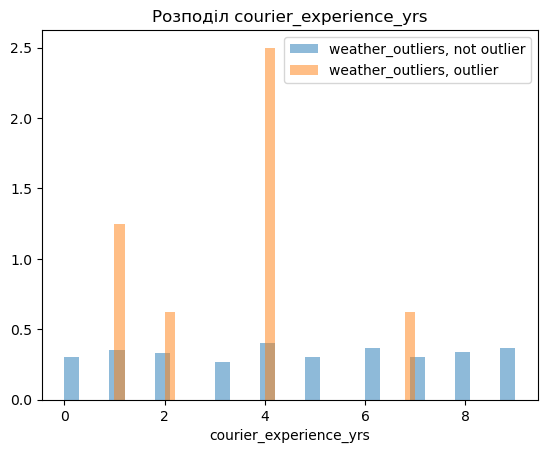

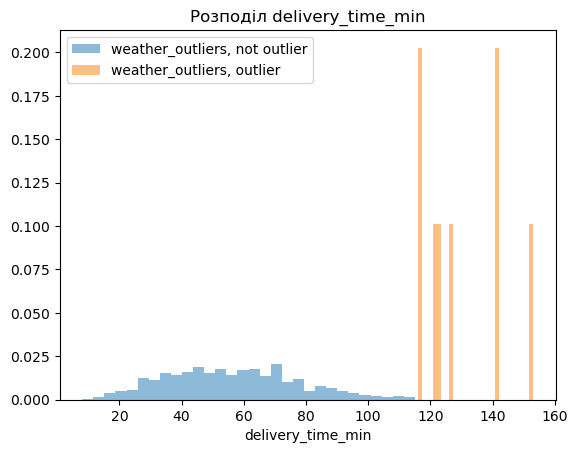

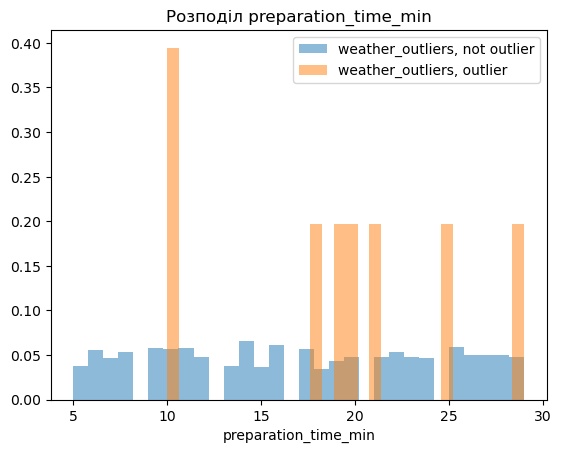

(993, 15) (7, 15)


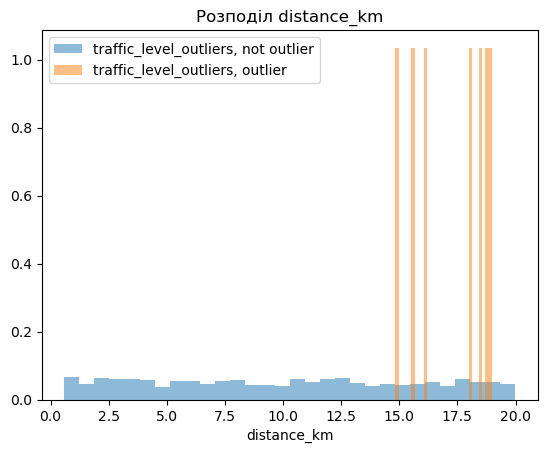

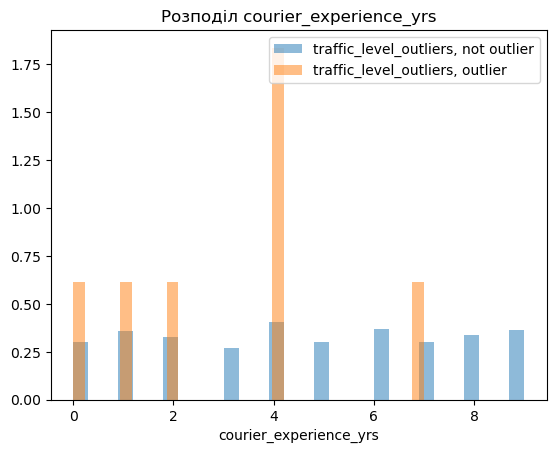

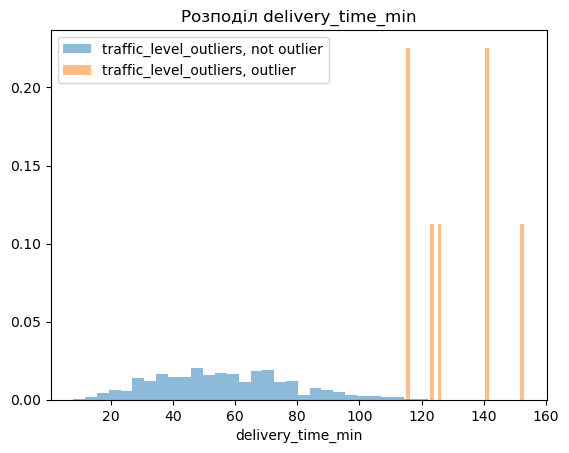

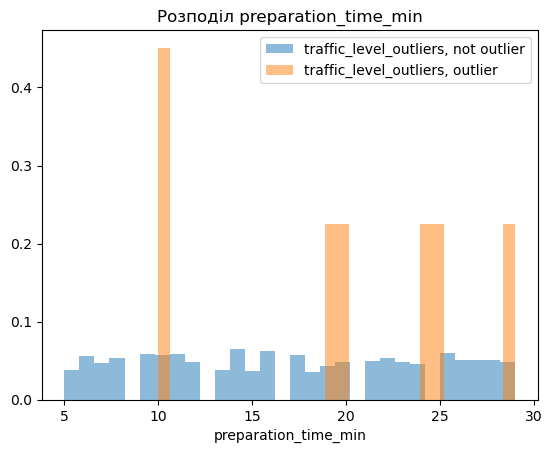

(991, 15) (9, 15)


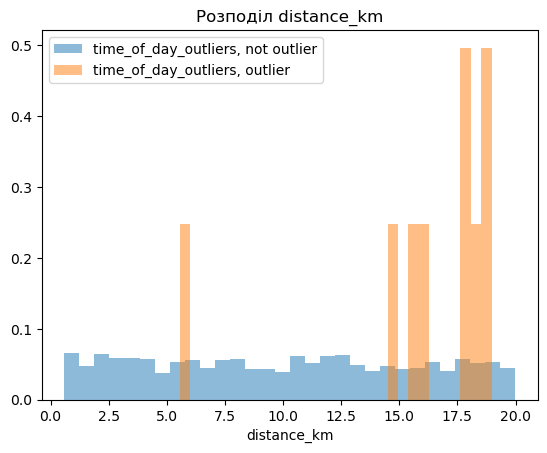

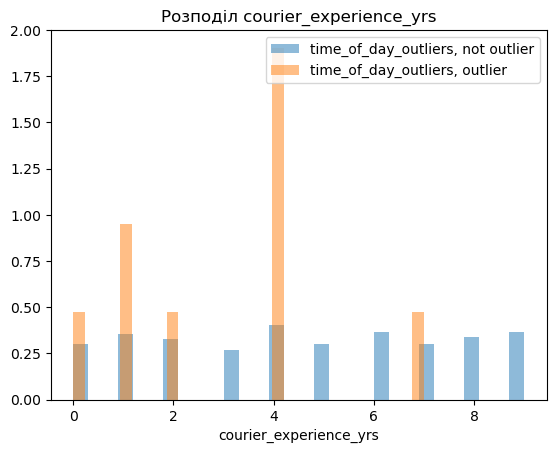

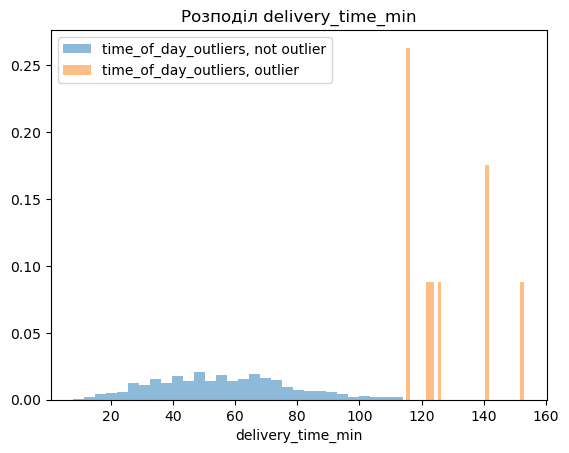

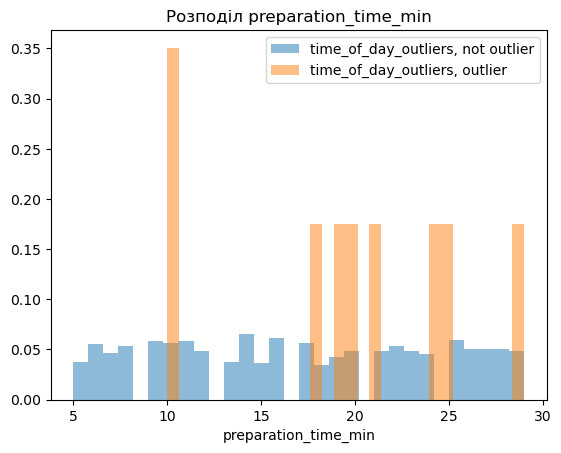

(993, 15) (7, 15)


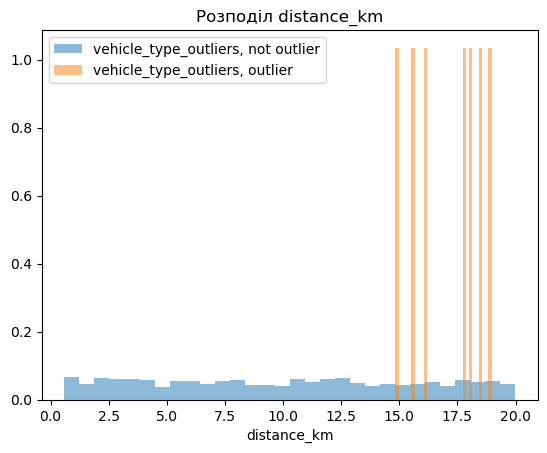

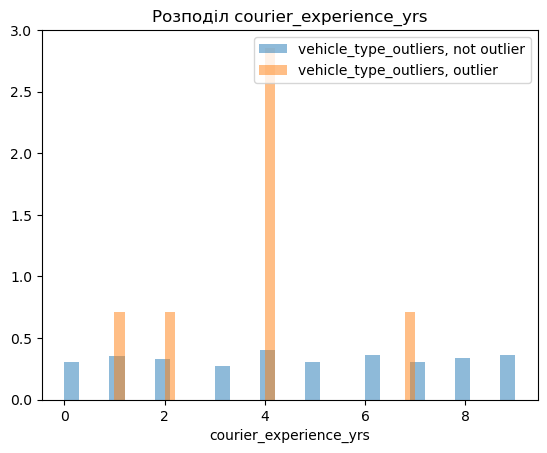

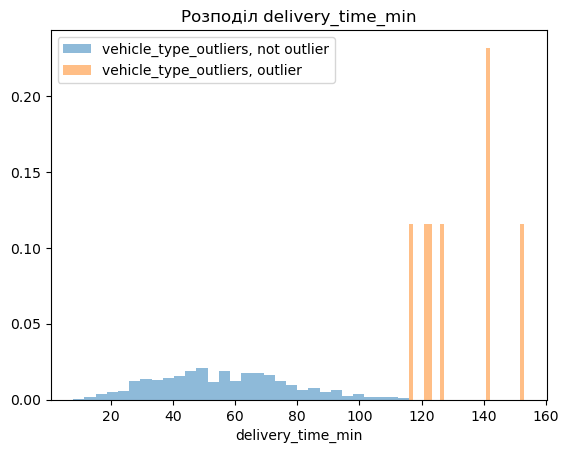

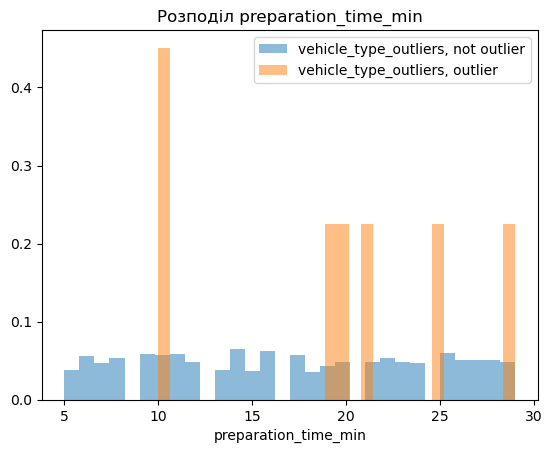

(992, 15) (8, 15)


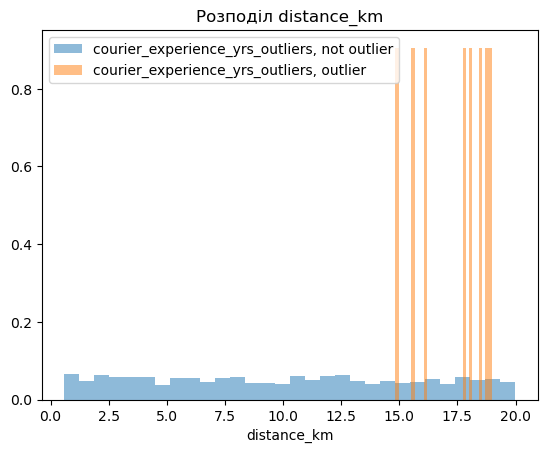

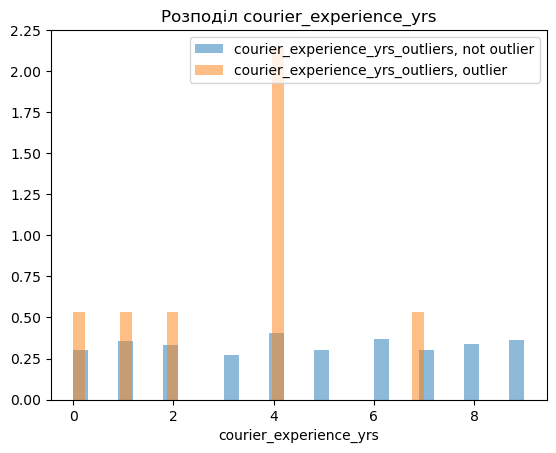

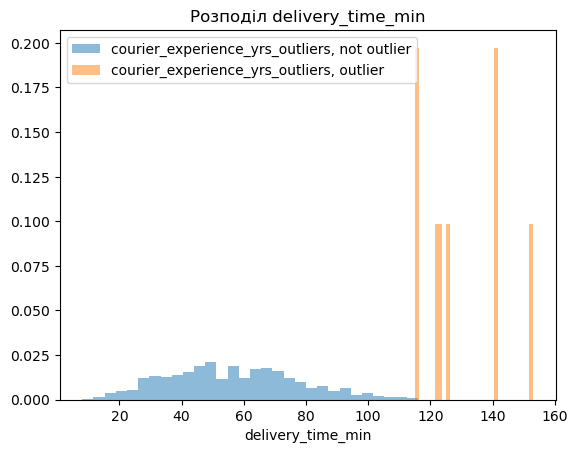

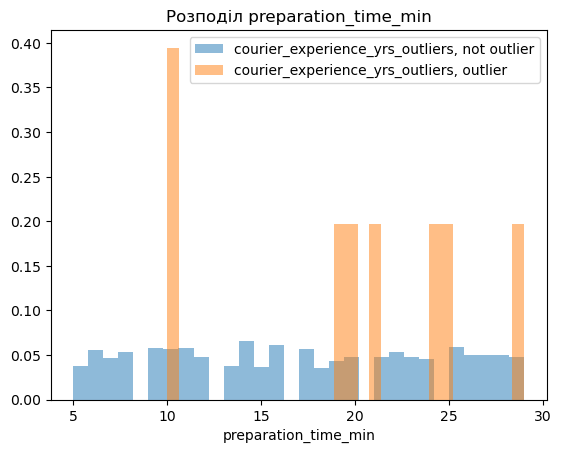

In [776]:
for i in [i for i in df.columns if 'outlier' in i]:
    feature_distribution(df, i)

In [777]:
outliers_prepra_time = df[df['preparation_time_min_outliers']]
normal_prepra_time = df[~df['preparation_time_min_outliers']]

In [778]:
outliers_prepra_time.describe()

distance_km  preparation_time_min  courier_experience_yrs  \
count    25.000000             25.000000                25.00000   
mean     15.698800             17.480000                 3.56000   
std       4.323905              6.615134                 2.45085   
min       5.550000              6.000000                 0.00000   
25%      13.990000             12.000000                 1.00000   
50%      17.810000             19.000000                 4.00000   
75%      18.970000             22.000000                 6.00000   
max      19.990000             29.000000                 8.00000   

       delivery_time_min  
count           25.00000  
mean           114.84000  
std             13.46811  
min             96.00000  
25%            108.00000  
50%            112.00000  
75%            116.00000  
max            153.00000

In [779]:
normal_prepra_time.describe()

distance_km  preparation_time_min  courier_experience_yrs  \
count   975.000000            975.000000              975.000000   
mean      9.915385             16.969231                4.587692   
std       5.655714              7.221707                2.878486   
min       0.590000              5.000000                0.000000   
25%       4.930000             11.000000                2.000000   
50%      10.100000             17.000000                5.000000   
75%      14.740000             23.000000                7.000000   
max      19.940000             29.000000                9.000000   

       delivery_time_min  
count         975.000000  
mean           55.242051  
std            20.156138  
min             8.000000  
25%            40.000000  
50%            55.000000  
75%            70.000000  
max           109.000000

In [780]:
def value_counts(df, columns):
    for i in columns:
        print(df[i].value_counts(normalize=True), '\n')

In [781]:
columns = outliers_prepra_time.select_dtypes('O').columns
value_counts(outliers_prepra_time, columns)

weather
Rainy    0.40
Clear    0.32
Foggy    0.12
Snowy    0.12
Windy    0.04
Name: proportion, dtype: float64 

traffic_level
High      0.44
Medium    0.32
Low       0.24
Name: proportion, dtype: float64 

time_of_day
Evening      0.52
Morning      0.36
Night        0.08
Afternoon    0.04
Name: proportion, dtype: float64 

vehicle_type
Bike       0.52
Scooter    0.24
Car        0.24
Name: proportion, dtype: float64 



In [782]:
columns = normal_prepra_time.select_dtypes('O').columns
value_counts(normal_prepra_time, columns)

weather
Clear    0.504615
Rainy    0.198974
Foggy    0.102564
Windy    0.097436
Snowy    0.096410
Name: proportion, dtype: float64 

traffic_level
Medium    0.422564
Low       0.386667
High      0.190769
Name: proportion, dtype: float64 

time_of_day
Morning      0.337436
Afternoon    0.290256
Evening      0.287179
Night        0.085128
Name: proportion, dtype: float64 

vehicle_type
Bike       0.502564
Scooter    0.303590
Car        0.193846
Name: proportion, dtype: float64 



In [783]:
df[(df['courier_experience_yrs'] < 5) & (df['distance_km'] > 12)].describe()

distance_km  preparation_time_min  courier_experience_yrs  \
count   199.000000            199.000000              199.000000   
mean     15.885427             17.055276                1.994975   
std       2.323352              7.408155                1.485613   
min      12.020000              5.000000                0.000000   
25%      13.815000             11.000000                1.000000   
50%      16.100000             17.000000                2.000000   
75%      17.960000             24.000000                3.000000   
max      19.990000             29.000000                4.000000   

       delivery_time_min  
count         199.000000  
mean           76.703518  
std            18.827970  
min            39.000000  
25%            64.000000  
50%            73.000000  
75%            88.000000  
max           153.000000

In [784]:
df[(df['courier_experience_yrs'] >= 5) & (df['distance_km'] > 12)].describe()

distance_km  preparation_time_min  courier_experience_yrs  \
count   203.000000            203.000000              203.000000   
mean     16.045123             16.763547                7.014778   
std       2.422563              7.156888                1.369678   
min      12.010000              5.000000                5.000000   
25%      14.020000             10.500000                6.000000   
50%      16.090000             16.000000                7.000000   
75%      18.295000             23.000000                8.000000   
max      19.940000             29.000000                9.000000   

       delivery_time_min  
count         203.000000  
mean           72.443350  
std            14.488319  
min            35.000000  
25%            64.000000  
50%            71.000000  
75%            80.500000  
max           123.000000

# Данные, которые выглядят как выбросы, на самом деле обьясняються:
- существенно выше дистанцией доставки (15.7 против 9.9 км)
- менее опытными курьерами, которые берут заказ (3.56 против 4.59 лет)
- немного дольше время требуется для подготовки товара (17.48 против 16.97 мин)
- в период доставки трафик на дорогах всегда хуже (высокий 0.44-0.19), и погода хуже

Для решения проблемы задержек таких заказов может помочь селективно отдавать заказы более опытным курьерам, в среднем они быстрее доставляют заказы на 12 или более км (72.4 против 76.7 мин).


Дані, які виглядають як викиди, насправді пояснюються:
- суттєво вищою дистанцією доставки (15.7 проти 9.9 км)
- менш досвідченими кур'єрами, які беруть замовлення (3.56 проти 4.59 років)
- трохи довший час потрібен для підготовки товару (17.48 проти 16.97 хв)
- у період доставки трафік на дорогах завжди гірший (високий 0.44-0.19), і погода гірша

Для вирішення проблеми затримок таких замовлень може допомогти селективно віддавати замовлення більш досвідченим кур'єрам, у середньому вони швидше доставляють замовлення на 12 або більше км (72.4 проти 76.7 хв).


Translated with DeepL.com (free version)

In [785]:
df.head()

distance_km weather traffic_level time_of_day vehicle_type  \
0         7.93   Windy           Low   Afternoon      Scooter   
1        16.42   Clear        Medium     Evening         Bike   
2         9.52   Foggy           Low       Night      Scooter   
3         7.44   Rainy        Medium   Afternoon      Scooter   
4        19.03   Clear           Low     Morning         Bike   

   preparation_time_min  courier_experience_yrs  delivery_time_min  \
0                    12                       1                 43   
1                    20                       2                 84   
2                    28                       1                 59   
3                     5                       1                 37   
4                    16                       5                 68   

   distance_km_outliers  preparation_time_min_outliers  weather_outliers  \
0                 False                          False             False   
1                 False                          False             False   
2                 False                          False             False   
3                 False                          False             False   
4                 False                          False             False   

   traffic_level_outliers  time_of_day_outliers  vehicle_type_outliers  \
0                   False                 False                  False   
1                   False                 False                  False   
2                   False                 False                  False   
3                   False                 False                  False   
4                   False                 False                  False   

   courier_experience_yrs_outliers  
0                            False  
1                            False  
2                            False  
3                            False  
4                            False

In [786]:
df_outliers = df.copy()

outliers_col = [i for i in df.columns if 'outliers' in i]
df.drop(outliers_col, inplace=True, axis=1)

In [787]:
df.head()

distance_km weather traffic_level time_of_day vehicle_type  \
0         7.93   Windy           Low   Afternoon      Scooter   
1        16.42   Clear        Medium     Evening         Bike   
2         9.52   Foggy           Low       Night      Scooter   
3         7.44   Rainy        Medium   Afternoon      Scooter   
4        19.03   Clear           Low     Morning         Bike   

   preparation_time_min  courier_experience_yrs  delivery_time_min  
0                    12                       1                 43  
1                    20                       2                 84  
2                    28                       1                 59  
3                     5                       1                 37  
4                    16                       5                 68

In [788]:
dummies_col = ['weather', 'time_of_day', 'vehicle_type']
dummies = pd.get_dummies(df[dummies_col], drop_first=True) * 1
df.drop(['weather', 'time_of_day', 'vehicle_type'], inplace=True, axis=1)
df = pd.concat([df, dummies], axis=1)

In [789]:
df.head()

distance_km traffic_level  preparation_time_min  courier_experience_yrs  \
0         7.93           Low                    12                       1   
1        16.42        Medium                    20                       2   
2         9.52           Low                    28                       1   
3         7.44        Medium                     5                       1   
4        19.03           Low                    16                       5   

   delivery_time_min  weather_Foggy  weather_Rainy  weather_Snowy  \
0                 43              0              0              0   
1                 84              0              0              0   
2                 59              1              0              0   
3                 37              0              1              0   
4                 68              0              0              0   

   weather_Windy  time_of_day_Evening  time_of_day_Morning  time_of_day_Night  \
0              1                    0                    0                  0   
1              0                    1                    0                  0   
2              0                    0                    0                  1   
3              0                    0                    0                  0   
4              0                    0                    1                  0   

   vehicle_type_Car  vehicle_type_Scooter  
0                 0                     1  
1                 0                     0  
2                 0                     1  
3                 0                     1  
4                 0                     0

In [790]:
encoder = OrdinalEncoder(categories=[df['traffic_level'].unique().tolist()])
encoded_data = encoder.fit_transform(df['traffic_level'].values.reshape(-1, 1))

In [791]:
df['traffic_level_ord'] = encoded_data
df.sample(10)

distance_km traffic_level  preparation_time_min  courier_experience_yrs  \
463        12.26           Low                    20                       2   
285        19.32          High                    21                       7   
713        11.88        Medium                     5                       1   
403        19.99          High                    17                       1   
683        12.22           Low                    15                       0   
272         4.55           Low                     5                       6   
372        19.27          High                    14                       6   
941         5.81        Medium                    14                       8   
119         2.98        Medium                    11                       2   
577         0.74           Low                    13                       4   

     delivery_time_min  weather_Foggy  weather_Rainy  weather_Snowy  \
463                 66              0              0              0   
285                112              0              1              0   
713                 63              0              1              0   
403                112              0              1              0   
683                 56              0              0              0   
272                 21              0              1              0   
372                 92              1              0              0   
941                 41              0              1              0   
119                 27              1              0              0   
577                 21              0              1              0   

     weather_Windy  time_of_day_Evening  time_of_day_Morning  \
463              0                    0                    0   
285              0                    0                    1   
713              0                    0                    0   
403              0                    1                    0   
683              0                    1                    0   
272              0                    0                    0   
372              0                    0                    0   
941              0                    1                    0   
119              0                    0                    0   
577              0                    0                    1   

     time_of_day_Night  vehicle_type_Car  vehicle_type_Scooter  \
463                  0                 0                     0   
285                  0                 1                     0   
713                  0                 0                     0   
403                  0                 0                     0   
683                  0                 0                     1   
272                  0                 0                     0   
372                  0                 0                     0   
941                  0                 0                     0   
119                  1                 0                     0   
577                  0                 1                     0   

     traffic_level_ord  
463                0.0  
285                2.0  
713                1.0  
403                2.0  
683                0.0  
272                0.0  
372                2.0  
941                1.0  
119                1.0  
577                0.0

In [792]:
df.drop('traffic_level', inplace=True, axis=1)

In [801]:
y = df['delivery_time_min']
X = df.drop('delivery_time_min', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

huber = HuberRegressor()
huber.fit(X_train, y_train)

y_pred = huber.predict(X_test)

print(f'R^2 {r2_score(y_test, y_pred)}')

R^2 0.8265528564312429


In [794]:
coef = pd.DataFrame(index=X.columns, data=huber.coef_)
coef.rename(columns={0: 'coef'}, inplace=True)
coef

coef
distance_km             3.013866
preparation_time_min    0.979211
courier_experience_yrs -0.651327
weather_Foggy           5.592133
weather_Rainy           4.528696
weather_Snowy           9.457296
weather_Windy           2.468693
time_of_day_Evening     0.028834
time_of_day_Morning    -0.492728
time_of_day_Night      -1.567902
vehicle_type_Car       -0.413074
vehicle_type_Scooter   -1.120325
traffic_level_ord       5.402465

In [795]:
coef.apply(abs).sort_values('coef', ascending=False)

coef
weather_Snowy           9.457296
weather_Foggy           5.592133
traffic_level_ord       5.402465
weather_Rainy           4.528696
distance_km             3.013866
weather_Windy           2.468693
time_of_day_Night       1.567902
vehicle_type_Scooter    1.120325
preparation_time_min    0.979211
courier_experience_yrs  0.651327
time_of_day_Morning     0.492728
vehicle_type_Car        0.413074
time_of_day_Evening     0.028834

In [796]:
huber.intercept_

5.359999530425072